# GROUP 24 - USA Maryland State Crime Dataset
- Nazanin Zakizadeh K2144935
- Sayda Rabia Altaf K2164077
- Jeevan Mohan Pawar K2242210
- Kantheti Dhana Shravya K2247431

# 1: Initial Setup

## 1.1: Installing Libraries

In [1]:
# Installing all the required libraries
!pip install numpy
!pip install pandas
!pip install datetime
!pip install matplotlib
!pip install seaborn
!pip install folium
!pip install geopy

## 1.2: Importing Libraries

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Importing datetime for working with temporal data
from datetime import datetime 

# Importing libaries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium

# Importing the libraries for working with geographical data
from geopy.geocoders import Nominatim
from random import randint
from time import sleep

## 1.3: Reading the Dataset

In [3]:
# Read the csv file into a dataframe
df = pd.read_csv('Crime.csv', low_memory=False)

In [4]:
# Printing first eight records
df.head(8)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
5,201204355,2404,180043926,09/03/2018 12:06:54 PM,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
6,201121509,5213,17008780,NaN,520,1,Crime Against Society,Weapon Law Violations,WEAPON - FIRING,WHEATON,...,NaN,PUNCH,NaN,ST,02/18/2017 12:18:00 AM,NaN,39.088902,-77.042262,4D,"(39.0889, -77.0423)"
7,201091648,1103,16038843,NaN,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,BEL PRE,NaN,RD,07/31/2016 11:00:00 PM,08/01/2016 05:32:00 AM,39.093783,-77.076369,4D,"(39.0938, -77.0764)"


In [5]:
# Printing last eight records
df.tail(8)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
306086,201324392,2610,210010779,03/22/2021 03:16:15 PM,26F,1,Crime Against Property,Identity Theft,IDENTITY THEFT,WHEATON,...,NaN,WALKINGFERN,NaN,DR,03/22/2021 03:59:00 PM,NaN,39.122271,-77.097909,4D,"(39.1223, -77.0979)"
306087,201325975,1315,210012363,04/02/2021 06:06:55 PM,13A,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,ROCKVILLE,...,NaN,ROCKVILLE,NaN,PIK,04/02/2021 06:06:00 PM,04/02/2021 06:10:00 PM,39.085193,-77.148221,1D,"(39.0852, -77.1482)"
306088,201330811,2902,210018244,05/14/2021 11:19:11 PM,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,WHEATON,...,NaN,GEORGIA,NaN,AVE,05/14/2021 08:45:00 PM,NaN,39.041513,-77.051713,4D,"(39.0415, -77.0517)"
306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,TRANSHIRE,NaN,RD,02/20/2021 08:00:00 PM,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,ATHERTON,NaN,DR,05/06/2021 03:15:00 AM,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,BALTUSROL,NaN,DR,05/05/2021 10:38:00 PM,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,NaN,FENTON,NaN,ST,03/13/2021 01:35:00 PM,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)"
306093,201327806,2305,210014587,04/19/2021 02:17:29 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,BETHESDA,...,NaN,NEWPORT MILL,NaN,RD,04/18/2021 04:00:00 PM,04/19/2021 12:00:00 PM,39.037115,-77.072485,2D,"(39.0371, -77.0725)"


# 2: Initial Data Quality Assessment

## 2.1: Check Missing/Null Values

In [6]:
# Overview of the records and columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

In [7]:
# Checking null values in the different columns
print(df.isna().sum())

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

## 2.2: Detecting Duplicates

In [8]:
# Checking any record duplications
print(df.duplicated().sum()) # We have no duplicates in this data

0


## 2.3: Detecting Outliers

In [11]:
def outliers(data_f, feature):
    '''
    This function computes the Upper Limit and Lower Limit for the given feature using IQR,
    and then returns them.
    ''' 
    print(f"\n\nStatistics before removing outliers from {feature}: ")
    print(data_f[feature].describe(percentiles=[.05, .25, .5, .75, .90, .95]))
    Q1= data_f[feature].quantile(0.25)
    Q3 = data_f[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

def print_outliers(data_f, feature):
    '''
    This function plots the given feature using boxplot and prints the outliers in a given feature.
    '''
    sns.boxplot(x=data_f[feature])
    upper, lower = outliers(data_f, feature)
    print("Upper whisker: ", upper)
    print("Lower Whisker: ", lower)
    print(data_f[(data_f[feature] < lower) | (data_f[feature] > upper)])

### 2.3.1: Outliers in Victims



Statistics before removing outliers from Victims: 
count    306094.000000
mean          1.022692
std           0.192311
min           1.000000
5%            1.000000
25%           1.000000
50%           1.000000
75%           1.000000
90%           1.000000
95%           1.000000
max          22.000000
Name: Victims, dtype: float64
Upper whisker:  1.0
Lower Whisker:  1.0
        Incident ID Offence Code  CR Number    Dispatch Date / Time  \
80        201261625         1399  190050287  10/20/2019 02:30:00 AM   
146       201292971         1399  200025327  06/29/2020 05:18:19 PM   
157       201340170         1399  210029773  08/01/2021 12:33:18 AM   
190       201163756         1199  170544973  11/26/2017 11:52:42 AM   
249       201336398         1399  210025016  06/29/2021 11:24:56 PM   
...             ...          ...        ...                     ...   
305904    201323713         1399  210010057  03/17/2021 06:39:36 PM   
305928    201319736         1313  210005673  02/13/2021 

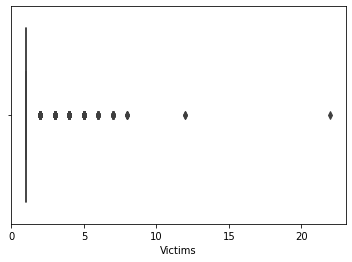

In [12]:
print_outliers(df, "Victims")

Decision: We are not considering to remove these outlier records based on the "Victims", as they might include crucial information.

### 2.3.2: Outliers in Latitude and Longtitude



Statistics before removing outliers from Latitude: 
count    306094.000000
mean         38.146328
std           5.974082
min           0.000000
5%           38.977420
25%          39.020392
50%          39.072844
75%          39.142072
90%          39.178539
95%          39.194183
max          90.000000
Name: Latitude, dtype: float64
Upper whisker:  39.32459248849999
Lower Whisker:  38.837872076500005
        Incident ID Offence Code  CR Number    Dispatch Date / Time  \
13        201357499         5404  210051644  12/18/2021 11:30:27 PM   
42        201358863         5404  210053293  12/31/2021 01:47:33 AM   
53        201346532         2305  210037745  09/24/2021 05:25:58 AM   
162       201357957         9105  210052242  12/22/2021 05:25:02 PM   
200       201336300         2303  210024908  06/29/2021 11:47:11 AM   
...             ...          ...        ...                     ...   
304884    201326011         5404  210012406  04/03/2021 12:41:14 AM   
305211    201319591      

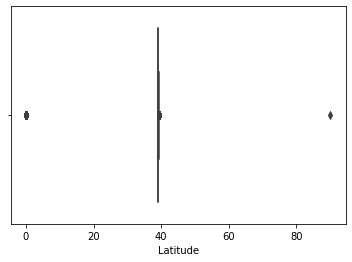

In [13]:
print_outliers(df, "Latitude")



Statistics before removing outliers from Longitude: 
count    306094.000000
mean        -75.269490
std          11.786118
min         -77.516753
5%          -77.267350
25%         -77.197117
50%         -77.099464
75%         -77.029046
90%         -76.988500
95%         -76.950820
max           0.000000
Name: Longitude, dtype: float64
Upper whisker:  -76.77693827299998
Lower Whisker:  -77.449224577
        Incident ID Offence Code  CR Number    Dispatch Date / Time  \
13        201357499         5404  210051644  12/18/2021 11:30:27 PM   
42        201358863         5404  210053293  12/31/2021 01:47:33 AM   
53        201346532         2305  210037745  09/24/2021 05:25:58 AM   
162       201357957         9105  210052242  12/22/2021 05:25:02 PM   
200       201336300         2303  210024908  06/29/2021 11:47:11 AM   
...             ...          ...        ...                     ...   
304884    201326011         5404  210012406  04/03/2021 12:41:14 AM   
305211    201319591        

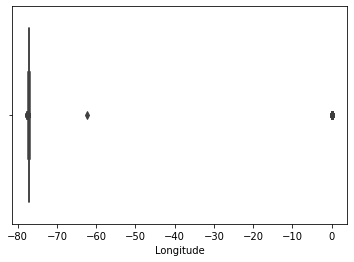

In [14]:
print_outliers(df, "Longitude")

Decision: We are considering to fix these outlier records based on the geographical features in the **Section 3.1.5**, as we have **7325 records** with Latitude and Longitude as (0, 0).

# 3: Exploratory Data Analysis

## 3.1: Data Cleaning

### 3.1.1: Fixing Crime Names

NIBRS Codes have crime names associated with them. Based on the analysis, it is observed that all the null values of Crime Name columns can be categorized by the following three NIBRS codes - 26G,35A,90Z.

In [15]:
df.groupby('NIBRS Code').agg({'Crime Name1': lambda x: x.isnull().sum(),'Crime Name2': lambda x: x.isnull().sum()})

,Crime Name1,Crime Name2
NIBRS Code,,
09A,0,0
09B,0,0
09C,0,0
100,0,0
11A,0,0
11B,0,0
11C,0,0
11D,0,0
120,0,0


According to the official documentation, NIBRS Codes have a crime name and crime against detail associated with each of them. Using this information, the Crime Name 1 and Crime Name 2 columns can be replaced by their corresponding NIBRS Codes information.
In the code below, every row in the dataframe is checked if the NIBRS Code is one of the three codes mentioned above(26G,35A,90Z). If the NIBRS codes of the rows match one of these, it will replace the Crime Name 1 and Crime Name 2 fields with their corresponding crime name details in accordance with the official documentation. 

In [16]:
def replace_crime_name(df, nibrs_code, crime_name_1, crime_name_2):
    '''
    This function checks if the NIBRS Code of the rows getting processed in one of the three specified NIBRS Crime
    Codes, and maps the column based on the condition, using fillna() method, we replace the null values.
    '''
    cond=df['NIBRS Code']==nibrs_code
    df['Crime Name1'] = df['Crime Name1'].fillna(cond.map({True: crime_name_1}))
    df['Crime Name2'] = df['Crime Name2'].fillna(cond.map({True: crime_name_2}))
    return df

In [17]:
df = replace_crime_name(df, '26G', 'Crime Against Property', 'Hacking/Computer Invasion')
df = replace_crime_name(df, '35A', 'Crime Against Society', 'Drug/Narcotic Violations')
df = replace_crime_name(df, '90Z', 'Crime Against Society/Property/Person', 'All Other Offences')

In [18]:
# Number of null values in crime name1 column, after replacing them
df['Crime Name1'].isna().sum()

0

In [19]:
# Number of null values in crime name2 column, after replacing them
df['Crime Name2'].isna().sum()

0

### 3.1.2: Fixing Police District Names

For the ‘Police District Name’ feature, there are 94 null values. To fix these, we looked into the ‘Police District Number’ and see what is the ‘Police District Number’ for those missing ‘Police District Name’.
We found out that those missing 'Police District Name' have the following 'Police District Numbers':
8.0D, 6.0D, 5.0D, 4.0D, 3.0D, and 1.0D
We then filtered those records that have police district names for these police district numbers. We found out that there exists a one-to-one mapping as follows:
* ‘8D': 'CITY OF TAKOMA PARK',
* '6D': 'MONTGOMERY VILLAGE',
* '5D': 'GERMANTOWN',
* '4D': 'WHEATON',
* '3D': 'SILVER SPRING',
* '1D': 'ROCKVILLE'

Now, all we have to do is replace those invalid police district names by replacing them using the above dictionary.
We take one record, check the police district number, and then replace the null police district name with the respective name from the dictionary.o accomplish this we applied value_counts() and isna() to count the null values. 


In [20]:
def replace_null_police_district_name(df_n, police_district_num):
    '''
    This function is replacing null police district names according to the police_dist_name_dict (explained above)
    and returning a new  dataframe that doesnt have any null record for police district name
    '''
    police_dist_name_dict ={
        '8.0D': 'CITY OF TAKOMA PARK',
        '6.0D': 'MONTGOMERY VILLAGE',
        '5.0D': 'GERMANTOWN',
        '4.0D': 'WHEATON',
        '3.0D': 'SILVER SPRING',
        '1.0D': 'ROCKVILLE'
    }
    print("\n---------------------------")
    print("Null values before replacement:")
    print("---------------------------")
    print(df[df['Police District Name'].isna()]['Police District Number'].value_counts())
    df_num = df[df['Police District Name'].isna()]['Police District Number'] == police_district_num
    indexes = df[df['Police District Name'].isna()][df_num]['Police District Name'].index
    df.iloc[indexes, 9] = police_dist_name_dict[police_district_num]
    print("---------------------------")
    print("Null values after replacement:")
    print("---------------------------")
    print(df[df['Police District Name'].isna()]['Police District Number'].value_counts())
    return df

In [21]:
df = replace_null_police_district_name(df,'8.0D')


---------------------------
Null values before replacement:
---------------------------
8.0D    82
3.0D     6
6.0D     2
5.0D     2
1.0D     1
4.0D     1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
3.0D    6
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [22]:
df = replace_null_police_district_name(df,'3.0D')


---------------------------
Null values before replacement:
---------------------------
3.0D    6
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [23]:
df = replace_null_police_district_name(df,'6.0D')


---------------------------
Null values before replacement:
---------------------------
6.0D    2
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [24]:
df = replace_null_police_district_name(df,'5.0D')


---------------------------
Null values before replacement:
---------------------------
5.0D    2
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64


In [25]:
df = replace_null_police_district_name(df,'1.0D')


---------------------------
Null values before replacement:
---------------------------
1.0D    1
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
4.0D    1
Name: Police District Number, dtype: int64


In [26]:
df = replace_null_police_district_name(df,'4.0D')


---------------------------
Null values before replacement:
---------------------------
4.0D    1
Name: Police District Number, dtype: int64
---------------------------
Null values after replacement:
---------------------------
Series([], Name: Police District Number, dtype: int64)


### 3.1.3: Fixing Police District Numbers

While replacing the police district names, we figured out that all those records that have null police district names have some input error for police district numbers as well as the numbers for those records are 8.0D,6.0D, 5.0D, 4.0D, 3.0D, 1.0D. If we group police district numbers we will see that the distribution is something like the following:

* 3D=20066
* 6D=19344
* 4D=19200
* 1D=16658
* 2D=16034
* 5D=13768
* 8D=1590
* TPPD=1204
* OTHER=212
* 8.0D=81
* 3.0D=6
* 6.0D=2
* 5.0D=2
* 1.0D=1
* 4.0D=1

It seems like while data entry for the police district number (in cases where the police district name is missing or null) some kind of float or the double value was entered by concatenating it with ‘D’ while in normal cases, an integer value was entered concatenating it with ‘D’ thus those records that have police district names as null, also have police district number with an additional ‘.0’. 
We also double-checked this by filtering the City feature for both police district numbers (with and without ‘.0’) and found out that these both numbers have the exact same mapping with regards to the other features as well.
Thus we came to the conclusion that this is some input error and to fix that we will simply replace those numbers with ‘.0’ with numbers that don't have ‘.0’.
We did this using replace function:

df['Police District Number'].replace(to_replace=number, value=replacement, inplace=True)


In [27]:
def replace_police_district_number(df, number, replacement):
    '''
    This function is replacing police district number with the right replacement(explained above) and returning the modified dataframe
    '''
    print("\n-----------------------------------")
    print(f'Before replacing {number} with {replacement}:')
    print("-------------------------------------")
    print(df['Police District Number'].value_counts())
    df['Police District Number'].replace(to_replace=number, value=replacement, inplace=True)
    print("\n-----------------------------------")
    print(f'After replacing {number} with {replacement}:')
    print("-------------------------------------")
    print(df['Police District Number'].value_counts())
    return df


In [28]:
df = replace_police_district_number(df, '1.0D', '1D')


-----------------------------------
Before replacing 1.0D with 1D:
-------------------------------------
3D       64388
4D       57568
6D       52539
2D       42777
1D       41535
5D       39255
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
6.0D         2
5.0D         2
1.0D         1
4.0D         1
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 1.0D with 1D:
-------------------------------------
3D       64388
4D       57568
6D       52539
2D       42777
1D       41536
5D       39255
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
6.0D         2
5.0D         2
4.0D         1
Name: Police District Number, dtype: int64


In [29]:
df = replace_police_district_number(df, '4.0D', '4D')


-----------------------------------
Before replacing 4.0D with 4D:
-------------------------------------
3D       64388
4D       57568
6D       52539
2D       42777
1D       41536
5D       39255
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
6.0D         2
5.0D         2
4.0D         1
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 4.0D with 4D:
-------------------------------------
3D       64388
4D       57569
6D       52539
2D       42777
1D       41536
5D       39255
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
6.0D         2
5.0D         2
Name: Police District Number, dtype: int64


In [30]:
df = replace_police_district_number(df, '5.0D', '5D')


-----------------------------------
Before replacing 5.0D with 5D:
-------------------------------------
3D       64388
4D       57569
6D       52539
2D       42777
1D       41536
5D       39255
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
6.0D         2
5.0D         2
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 5.0D with 5D:
-------------------------------------
3D       64388
4D       57569
6D       52539
2D       42777
1D       41536
5D       39257
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
6.0D         2
Name: Police District Number, dtype: int64


In [31]:
df = replace_police_district_number(df, '6.0D', '6D')


-----------------------------------
Before replacing 6.0D with 6D:
-------------------------------------
3D       64388
4D       57569
6D       52539
2D       42777
1D       41536
5D       39257
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
6.0D         2
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 6.0D with 6D:
-------------------------------------
3D       64388
4D       57569
6D       52541
2D       42777
1D       41536
5D       39257
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
Name: Police District Number, dtype: int64


In [32]:
df = replace_police_district_number(df, '3.0D', '3D')


-----------------------------------
Before replacing 3.0D with 3D:
-------------------------------------
3D       64388
4D       57569
6D       52541
2D       42777
1D       41536
5D       39257
8D        6408
TPPD      1284
OTHER      246
8.0D        82
3.0D         6
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 3.0D with 3D:
-------------------------------------
3D       64394
4D       57569
6D       52541
2D       42777
1D       41536
5D       39257
8D        6408
TPPD      1284
OTHER      246
8.0D        82
Name: Police District Number, dtype: int64


In [33]:
df = replace_police_district_number(df, '8.0D', '8D')


-----------------------------------
Before replacing 8.0D with 8D:
-------------------------------------
3D       64394
4D       57569
6D       52541
2D       42777
1D       41536
5D       39257
8D        6408
TPPD      1284
OTHER      246
8.0D        82
Name: Police District Number, dtype: int64

-----------------------------------
After replacing 8.0D with 8D:
-------------------------------------
3D       64394
4D       57569
6D       52541
2D       42777
1D       41536
5D       39257
8D        6490
TPPD      1284
OTHER      246
Name: Police District Number, dtype: int64


### 3.1.4: Fixing Beats and Sectors

In [34]:
# Checking total null values in Beats and Sectors grouped by Police District Number
df.groupby('Police District Number').agg({'Beat': lambda x: x.isnull().sum(),'Sector': lambda x: x.isnull().sum()})

,Beat,Sector
Police District Number,,
1D,0,0
2D,0,0
3D,0,0
4D,0,0
5D,0,0
6D,0,0
8D,0,0
OTHER,246,246
TPPD,1284,1284


In [35]:
def replace_beats_and_sectors_null(df, police_district_number):
    '''
    This function checks the police district number and replaces its corresponding beats/sectors with other.
    '''
    cond_district = df['Police District Number'] == police_district_number
    df['Sector'] = df['Sector'].fillna(cond_district.map({True:'Other'}))
    df['Beat'] = df['Beat'].fillna(cond_district.map({True:'Other'}))
    return df

In [36]:
df = replace_beats_and_sectors_null(df,'TPPD')
df = replace_beats_and_sectors_null(df,'OTHER')

### 3.1.5: Fixing geographical data - Latitude and Longitude, City and State

In [15]:
# Checking all US States and their counts in the dataset

print(df['State'].value_counts()) # This gives a count of all the US States, there are typing errors and need to be fixed

# USA States have Abbreviations and FIPS for all it's states
# We will need to change all the records to follow the standard abbreviation as seen in most of the records

# DataFrame of USA States with ABBREVIATIONS and FIPS
# (ref https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm)

state_names = ['Maryland','Idaho','District of Columbia','Virginia','Maine','Mississippi','North Dakota','Hawaii',np.nan,np.nan,'Illinois']
state_abbrv = ['MD','ID','DC','VA','ME','MS','ND','HI',np.nan,'MC','IL']
state_fips  = ['24','16','11','51','23','28','38','15','0',np.nan,'17']

df_usa_states = pd.DataFrame({'State':state_names,
                              'Abbreviation':state_abbrv,
                              'FIPS':state_fips})

df_usa_states = df_usa_states.set_index('State')

print(df_usa_states)

# Defining some required variables

geolocator = None # For Nominatim object creation, we need to use different objects as the Nominatim Server has limitations
stored_lat_long_results = {} # For storing addresses retrieved from Nominatim Server, as it denies consequent similar requests

# Defining functions to replace a particular State FIPS to ABBREVIATION, to fix Latitude/Longitude and to fix City/State

# Function 1 : To replace FIPS of a particular State to ABBREVIAIONS in the 'State' column

def replace_FIPS_with_ABBREVIATION(fips):
    '''
    This function takes a particular FIPS, looks for respective State ABBREVIATION in df_usa_states DataFrame
    and replaces in the 'State' column
    '''
    df.replace({'State' : fips}, df_usa_states.loc[df_usa_states['FIPS'] == fips]['Abbreviation'].values[0], inplace=True)

# Function 2 : To fix Latitude/Longitude of rows having (0,0)
def set_correct_lat_long(street, city, state="Maryland"):
    '''
    This function takes the Street, City and State as arguments, and returns the actual Latitude, Longitude.
    It either returns (Latitude, Longitude) or (None, None) if not found.
    '''
    query_address = f"{street} {city} {state}" # Lets attempt to find coordinates with Street, City and State
    try:
        location = geolocator.geocode(query_address)
    except:
        # Some server issue occurred in retrieving information
        return None, None
    # sleep(1) # Sleep for 1 second, as Nominatim Server serves 1 request every second
    if location == None:
        # Lets attempt to find coordinates with just City and State now, otherwise return (None, None)
        query_address = f"{city} {state}"
        try:
            location = geolocator.geocode(query_address)
        except:
            # Some server issue occurred in retrieving information
            return None, None
        # sleep(1)
        if location == None:
            return None, None
        return location.latitude, location.longitude
    else:
        return location.latitude, location.longitude

# Function 3 : To fix City/State of rows based on Latitude and Longitude if the 'State' is not MD i.e Maryland.
# It will fix any typos in the 'State' column such as 'ME' and 'MS' instead of 'MD', we will retrieve address
# based on the Latitude/Longitude.

def set_correct_address(lat, long):
    '''
    This function will take the latitude and longitude as arguments, and returns the actual address.
    It either returns (City, State) or (Town, State) or (Village, State) 
    or (None,'Maryland') if in the 'Montgomery County' or (None, None) otherwise.
    '''
    if lat == 0 and long == 0:
        return None, None
    
    if f"{lat}_{long}" in stored_lat_long_results:
        address = stored_lat_long_results[f"{lat}_{long}"]
    else:
        try:
            location = geolocator.reverse(str(lat) + ',' + str(long))
        except:
            # Some server issue occurred in retrieving information
            return None, None
        # sleep(1)
        if location == None:
            return None, None
        address = location.raw['address']
        stored_lat_long_results[f"{lat}_{long}"] = address
    
    if 'county' in address and address['county'] == 'Montgomery County':
        if 'city' in address:
            return address['city'], address['state']
        elif 'town' in address:
            return address['town'], address['state']
        elif 'village' in address:
            return address['village'], address['state']
        else:
            # print(f"Returned Address : {address}")
            # Just return None, 'Maryland'
            return None, address['state']
    else:
        return None, None

MD    305874
16       185
DC        22
VA         4
ME         2
MS         2
ND         1
15         1
0          1
MC         1
17         1
Name: State, dtype: int64
                     Abbreviation FIPS
State                                 
Maryland                       MD   24
Idaho                          ID   16
District of Columbia           DC   11
Virginia                       VA   51
Maine                          ME   23
Mississippi                    MS   28
North Dakota                   ND   38
Hawaii                         HI   15
NaN                           NaN    0
NaN                            MC  NaN
Illinois                       IL   17


The following code cell contains clean-up process of the data that takes almost 1.5 hrs to finish in order to fix all the records having Latitude/Longitude as (0, 0) and subsequently the corrections in the City/State values of the records.

**Please Note : We have already ran this code cell, we have commented the code here to prevent unnecessary execution and save time.**

In [38]:
# # Replace the FIPS with ABBREVIATIONS
# replace_FIPS_with_ABBREVIATION('15')
# replace_FIPS_with_ABBREVIATION('16')
# replace_FIPS_with_ABBREVIATION('17')

# # Fix Latitude/Longitude
# for i, row in df.iterrows():
#     if row['Latitude'] == 0 and row['Longitude'] == 0: # Fixing (0,0) in Latitude/Longitude
#         # Add the logic to correct Latitude and Longitude
#         geolocator = Nominatim(user_agent=f"ADP_Group_{randint(10000,9999999)}")
#         lat, long = set_correct_lat_long(row['Street Name'], row['City'], 'Maryland')
#         if lat == None and long == None:
#             print(f"LAT LONG failed for index : {i}, Row : {df.loc[[i]][['City','State','Latitude','Longitude']]}")
#             continue
#         else:
#             df.at[i,'Latitude'] = lat
#             df.at[i,'Longitude'] = long

# # Fix City/State
# for i, row in df.iterrows():
#     # Fixing any incorrections in City/State based on Latitude/Longitude
#     if row['State'] != 'MD':
#         geolocator = Nominatim(user_agent=f"ADP_Group_{randint(10000,9999999)}")
#         city, state = set_correct_address(row['Latitude'],row['Longitude'])
#         # Check None, None
#         if city == None and state == None:
#             print(f"ADDRESS failed for index : {i}, Row : {df.loc[[i]][['City','State','Latitude','Longitude']]}")
#             continue
#         elif city == None and state == 'Maryland':
#             df.at[i,'State'] = df_usa_states.loc[state]['Abbreviation']
#         else:
#             df.at[i,'City'] = city.upper()
#             df.at[i,'State'] = df_usa_states.loc[state]['Abbreviation']

In [17]:
df_demo = df.loc[df['State'].isin(['16','DC','VA','ME','MS','ND','15','0','MC','17'])]

In [18]:
df_demo['State'].value_counts() # Before clean-up DEMO dataset

DC    22
VA     4
ME     2
MS     2
ND     1
0      1
MC     1
Name: State, dtype: int64

In [27]:
len(df_demo[df_demo['Latitude'] == 0])

22

In [28]:
# Replace the FIPS with ABBREVIATIONS
replace_FIPS_with_ABBREVIATION('15')
replace_FIPS_with_ABBREVIATION('16')
replace_FIPS_with_ABBREVIATION('17')

# Fix Latitude/Longitude
for i, row in df_demo.iterrows():
    if row['Latitude'] == 0 and row['Longitude'] == 0: # Fixing (0,0) in Latitude/Longitude
        # Add the logic to correct Latitude and Longitude
        geolocator = Nominatim(user_agent=f"ADP_Group_{randint(10000,9999999)}")
        lat, long = set_correct_lat_long(row['Street Name'], row['City'], 'Maryland')
        if lat == None and long == None:
            print(f"LAT LONG failed for index : {i}, Row : {df_demo.loc[[i]][['City','State','Latitude','Longitude']]}")
            continue
        else:
            df_demo.at[i,'Latitude'] = lat
            df_demo.at[i,'Longitude'] = long

# Fix City/State
for i, row in df_demo.iterrows():
    # Fixing any incorrections in City/State based on Latitude/Longitude
    if row['State'] != 'MD':
        geolocator = Nominatim(user_agent=f"ADP_Group_{randint(10000,9999999)}")
        city, state = set_correct_address(row['Latitude'],row['Longitude'])
        # Check None, None
        if city == None and state == None:
            print(f"ADDRESS failed for index : {i}, Row : {df_demo.loc[[i]][['City','State','Latitude','Longitude']]}")
            continue
        elif city == None and state == 'Maryland':
            df_demo.at[i,'State'] = df_usa_states.loc[state]['Abbreviation']
        else:
            df_demo.at[i,'City'] = city.upper()
            df_demo.at[i,'State'] = df_usa_states.loc[state]['Abbreviation']

ADDRESS failed for index : 2632, Row :             City State   Latitude  Longitude
2632  WASHINGTON    DC  39.480603 -77.748109
ADDRESS failed for index : 24255, Row :              City State   Latitude  Longitude
24255  WASHINGTON    DC  39.359262 -76.438005
ADDRESS failed for index : 25279, Row :              City State   Latitude  Longitude
25279  WASHINGTON    DC  38.934939 -76.962275
ADDRESS failed for index : 67688, Row :              City State  Latitude  Longitude
67688  WASHINGTON    DC  39.70514 -77.495798
ADDRESS failed for index : 75265, Row :              City State  Latitude  Longitude
75265  WASHINGTON    DC  39.58935 -77.710254
ADDRESS failed for index : 77382, Row :              City State   Latitude  Longitude
77382  WASHINGTON    DC  39.478544 -77.743842
ADDRESS failed for index : 84925, Row :              City State  Latitude  Longitude
84925  WASHINGTON    DC  39.58935 -77.710254
ADDRESS failed for index : 96594, Row :          City State   Latitude  Longitude
965

In [29]:
df_demo['State'].value_counts() # After clean-up DEMO dataset

MD    18
DC    14
VA     1
Name: State, dtype: int64

In [30]:
len(df_demo[df_demo['Latitude'] == 0])

0

### 3.1.6: Fixing Street Type

Lets first check if we can replace null street type with block address (by extracting street type from block address)

In [39]:
df['Street Type'].isna().sum()

339

In [40]:
df[df['Street Type'].isna()]['Block Address'].isna().sum()

339

As can be shown in the above results, all the Block Address fields are null where Street type is null. So we cannot extract street type from block address. 
Lets remove the records that have null street type as these records are very few.

In [41]:
def remove_null_records(df, feature):
    '''
    This function will remove the null records for the given feature
    '''
    print("\n-----------------------------------")
    print(f'Before removing {feature} null values count:')
    print("-------------------------------------")
    print(df[feature].isna().sum())
    df = df[df[feature].notna()]
    print("\n-----------------------------------")
    print(f'After removing {feature} null values count:')
    print("-------------------------------------")
    print(df[feature].isna().sum())
    return df

In [42]:
df = remove_null_records(df, 'Street Type')


-----------------------------------
Before removing Street Type null values count:
-------------------------------------
339

-----------------------------------
After removing Street Type null values count:
-------------------------------------
0


### 3.1.7: Fixing Crime Name3

In [43]:
df = remove_null_records(df, 'Crime Name3')


-----------------------------------
Before removing Crime Name3 null values count:
-------------------------------------
272

-----------------------------------
After removing Crime Name3 null values count:
-------------------------------------
0


### 3.1.8: Fixing remaining PRA null fields

In [44]:
df = remove_null_records(df, 'PRA')


-----------------------------------
Before removing PRA null values count:
-------------------------------------
238

-----------------------------------
After removing PRA null values count:
-------------------------------------
0


### 3.1.9: Fixing remaining null Zip Code

In [45]:
df = remove_null_records(df, 'Zip Code')


-----------------------------------
Before removing Zip Code null values count:
-------------------------------------
2957

-----------------------------------
After removing Zip Code null values count:
-------------------------------------
0


### 3.1.10:  Fixing remaining null City

In [46]:
df = remove_null_records(df, 'City')


-----------------------------------
Before removing City null values count:
-------------------------------------
1245

-----------------------------------
After removing City null values count:
-------------------------------------
0


In [47]:
# Remove records where city is '0'
df.drop(df.index[df['City'] == '0'], inplace=True)

## 3.2: Data Transformations

### 3.2.1: Transforming Start Date / Time

In [48]:
def sepereta_date_time_feature (df, feature, new_feature_1,  new_feature_2 , year_feature, month_feature, day_feature):
    df[feature] = pd.to_datetime(df[feature], format="%m/%d/%Y %H:%M:%S %p")
    print (f"The first 5 rows after reformating for {feature}:  ")
    print("-------------------------------------")
    print (df[feature].iloc[:5])
    df[new_feature_1] = [d.date() for d in df[feature]]
    df[new_feature_2] = [d.time() for d in df[feature]]
    print (f"after seperation the type of the {feature}: ")
    print("-------------------------------------")
    print (type(df.iloc[2][new_feature_1]))
    # Converting to timestamp,Date(so we can use value_count method)
    df[new_feature_1] = pd.to_datetime(df[new_feature_1])
    print (f"Now the type of the {new_feature_1} changed to: ")
    print("-------------------------------------")
    print(type(df.iloc[2][new_feature_1]))
    print ("The number of crimes in each year:" )
    print("-------------------------------------")
    print (df[new_feature_1].dt.year.value_counts())
    # Changing the date_time format to a proper format, so the are divided to the three columns,
    # year, month, and day
    df[year_feature] = df[new_feature_1].dt.year
    df[month_feature] =df[new_feature_1].dt.month
    df[day_feature] =df[new_feature_1].dt.day
    return df

In [49]:
df = sepereta_date_time_feature (df, "Start_Date_Time", "start_date",  "start_time" , "start_year", "start_month", "start_day")

The first 5 rows after reformating for Start_Date_Time:  
-------------------------------------
0   2018-08-23 09:52:00
1   2018-03-30 01:01:00
2   2018-03-30 01:01:00
3   2018-06-14 10:26:00
4   2018-09-02 11:30:00
Name: Start_Date_Time, dtype: datetime64[ns]
after seperation the type of the Start_Date_Time: 
-------------------------------------
<class 'datetime.date'>
Now the type of the start_date changed to: 
-------------------------------------
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
The number of crimes in each year:
-------------------------------------
2017    54965
2018    54042
2019    51140
2020    44509
2021    43323
2022    27008
2016    26055
Name: start_date, dtype: int64


In [50]:
# Assign day names in start_weekday column
df['start_weekday'] = df['start_date'].dt.day_name()
df

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Latitude,Longitude,Police District Number,Location,start_date,start_time,start_year,start_month,start_day,start_weekday
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018-08-23,09:52:00,2018,8,23,Thursday
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018-03-30,01:01:00,2018,3,30,Friday
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018-03-30,01:01:00,2018,3,30,Friday
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018-06-14,10:26:00,2018,6,14,Thursday
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018-09-02,11:30:00,2018,9,2,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,39.172701,-77.197340,6D,"(39.1727, -77.1973)",2021-02-20,08:00:00,2021,2,20,Saturday
306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,39.059672,-77.075995,4D,"(39.0597, -77.076)",2021-05-06,03:15:00,2021,5,6,Thursday
306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,39.199722,-77.273039,5D,"(39.1997, -77.273)",2021-05-05,10:38:00,2021,5,5,Wednesday
306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,38.985813,-77.022915,3D,"(38.9858, -77.0229)",2021-03-13,01:35:00,2021,3,13,Saturday


### 3.2.2: Transforming Dispatch Date / Time

In [51]:
# How many null values do we have in dispatch column
df["Dispatch Date / Time"].isna().sum()

46006

In [52]:
# The percentage of data with null values for dispatch column
(df["Dispatch Date / Time"].isna().sum())*100/df.shape[0]

15.282252974667987

##### 3.2.3: Extracting Dispatch Date/Time into a separate dataset

There are 46135 null values in the dispatch data time, which can be considered as the 15.2% of the data. As replacing them is rather an impossible option, we will delete the entire column from the main dataset. So we can keep the records for other features. But, we are going to do some analysis regarding the dispatch time, so, a seperate dataset is extracted from the main dataset, in which the records with null values in this feature is removed, and is going to be used just for the mentioned purpose.

In [53]:
def extract_dispatch_date_time_df(df):
    '''
    This function extracts Dispatch Date / Time column into a new dataframe without null records and returns
    the new dataframe.
    '''
    df_dispatch = df
    df_dispatch.dropna(subset=['Dispatch Date / Time'], inplace= True)
    df_dispatch["Dispatch Date / Time"].isna().sum()
    print(df_dispatch.shape)
    sepereta_date_time_feature (df_dispatch,"Dispatch Date / Time", "Dispatch_date",  "Dispatch_time" , "Dispatch_year", "Dispatch_month", "Dispatch_day")
    print(df_dispatch.columns)
    return df_dispatch

In [54]:
df_dispatch = extract_dispatch_date_time_df(df)

(255036, 36)
The first 5 rows after reformating for Dispatch Date / Time:  
-------------------------------------
0   2018-08-23 09:52:08
1   2018-03-30 01:00:55
2   2018-03-30 01:00:55
3   2018-06-14 10:26:45
4   2018-09-03 12:06:54
Name: Dispatch Date / Time, dtype: datetime64[ns]
after seperation the type of the Dispatch Date / Time: 
-------------------------------------
<class 'datetime.date'>
Now the type of the Dispatch_date changed to: 
-------------------------------------
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
The number of crimes in each year:
-------------------------------------
2018    53017
2019    46847
2020    43649
2021    42886
2017    40829
2022    27808
Name: Dispatch_date, dtype: int64
Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat'

## 3.3: Dropping Extra Features

In [55]:
def remove_additional_features(df, feature_name):
    '''
    This function removes a given feature from dataframe and returns the modified dataframe.
    '''
    if feature_name in df:
        df.drop(feature_name, inplace=True, axis=1)
        print(f'After removing {feature_name}:')
        print(df.columns)
        return df

### 3.3.1: Dropping Dispatch Date/Time

In [56]:
# Drop Dispatch Date / Time as it has many null values,
# we have extracted it into a new dataframe 'df_dispatch' for some analysis
df_dispatch_date_time = df[['Dispatch Date / Time','Start_Date_Time']].copy(deep=True)
df = remove_additional_features(df, 'Dispatch Date / Time')

After removing Dispatch Date / Time:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place',
       'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type', 'Start_Date_Time',
       'End_Date_Time', 'Latitude', 'Longitude', 'Police District Number',
       'Location', 'start_date', 'start_time', 'start_year', 'start_month',
       'start_day', 'start_weekday', 'Dispatch_date', 'Dispatch_time',
       'Dispatch_year', 'Dispatch_month', 'Dispatch_day'],
      dtype='object')


### 3.3.2: Dropping Block Address

In [57]:
# Drop Block Address as it has a lot of null values, and we have other features like 
# address name and street type that we can use for our research question instead of 
# using block address which is a combination of address number, address name, and street type.
df = remove_additional_features(df, 'Block Address')

After removing Block Address:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix',
       'Street Type', 'Start_Date_Time', 'End_Date_Time', 'Latitude',
       'Longitude', 'Police District Number', 'Location', 'start_date',
       'start_time', 'start_year', 'start_month', 'start_day', 'start_weekday',
       'Dispatch_date', 'Dispatch_time', 'Dispatch_year', 'Dispatch_month',
       'Dispatch_day'],
      dtype='object')


### 3.3.3: Dropping Street Prefix

In [58]:
# Street Prefix is not an important feature as it doesn't provide any information. 
# Also, missing data is too high to just remove those records. Thus, we simply drop this feature.
df = remove_additional_features(df, 'Street Prefix')

After removing Street Prefix:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'start_date', 'start_time',
       'start_year', 'start_month', 'start_day', 'start_weekday',
       'Dispatch_date', 'Dispatch_time', 'Dispatch_year', 'Dispatch_month',
       'Dispatch_day'],
      dtype='object')


### 3.3.4: Dropping Street Suffix

In [59]:
# Street Suffix is not an important feature as it doesn't provide any information. 
# Also, missing data is too high to just remove those records. Thus, we simply drop this feature.
df = remove_additional_features(df, 'Street Suffix')

After removing Street Suffix:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Address Number', 'Street Name', 'Street Type', 'Start_Date_Time',
       'End_Date_Time', 'Latitude', 'Longitude', 'Police District Number',
       'Location', 'start_date', 'start_time', 'start_year', 'start_month',
       'start_day', 'start_weekday', 'Dispatch_date', 'Dispatch_time',
       'Dispatch_year', 'Dispatch_month', 'Dispatch_day'],
      dtype='object')


### 3.3.5: Dropping Address Number

In [60]:
# Every record that has a null address number, has a null block address, thus we can't extract 
# the address number from the block address. As we have a street name, we don't need an address number, 
# we will simply drop this feature.
df = remove_additional_features(df, 'Address Number')

After removing Address Number:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Street Name', 'Street Type', 'Start_Date_Time', 'End_Date_Time',
       'Latitude', 'Longitude', 'Police District Number', 'Location',
       'start_date', 'start_time', 'start_year', 'start_month', 'start_day',
       'start_weekday', 'Dispatch_date', 'Dispatch_time', 'Dispatch_year',
       'Dispatch_month', 'Dispatch_day'],
      dtype='object')


### 3.3.6: Dropping Location

In [61]:
# Location is just a combination of Latitude and Longitude columns, hence contains repetitive information.
# We can safely drop this feature.
df =  remove_additional_features(df, 'Location')

After removing Location:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Street Name', 'Street Type', 'Start_Date_Time', 'End_Date_Time',
       'Latitude', 'Longitude', 'Police District Number', 'start_date',
       'start_time', 'start_year', 'start_month', 'start_day', 'start_weekday',
       'Dispatch_date', 'Dispatch_time', 'Dispatch_year', 'Dispatch_month',
       'Dispatch_day'],
      dtype='object')


In [62]:
# Almost 52% records don't have End_Date_Time for any significant analysis, hence we are removing it
df =  remove_additional_features(df, 'End_Date_Time')

After removing End_Date_Time:
Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'City', 'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Street Name', 'Street Type', 'Start_Date_Time', 'Latitude',
       'Longitude', 'Police District Number', 'start_date', 'start_time',
       'start_year', 'start_month', 'start_day', 'start_weekday',
       'Dispatch_date', 'Dispatch_time', 'Dispatch_year', 'Dispatch_month',
       'Dispatch_day'],
      dtype='object')


## 3.4: Feature's Normality Distribution

We can generate a frequency histogram to verify if our numerical data is normally distributed. This will guide future statistical research and let us know if the dataset has a normal distribution. For each of the columns of non-binary numerical data, histograms will be made.
Our Numerical data, after data cleaning, in this dataset, are as followed:

- 'Victims'
- 'start_year'
- 'start_month'
- 'start_day'
- 'Dispatch_year'
- 'Dispatch_month'
- 'Dispatch_day'
- 'Latitude'
- 'Longitude'

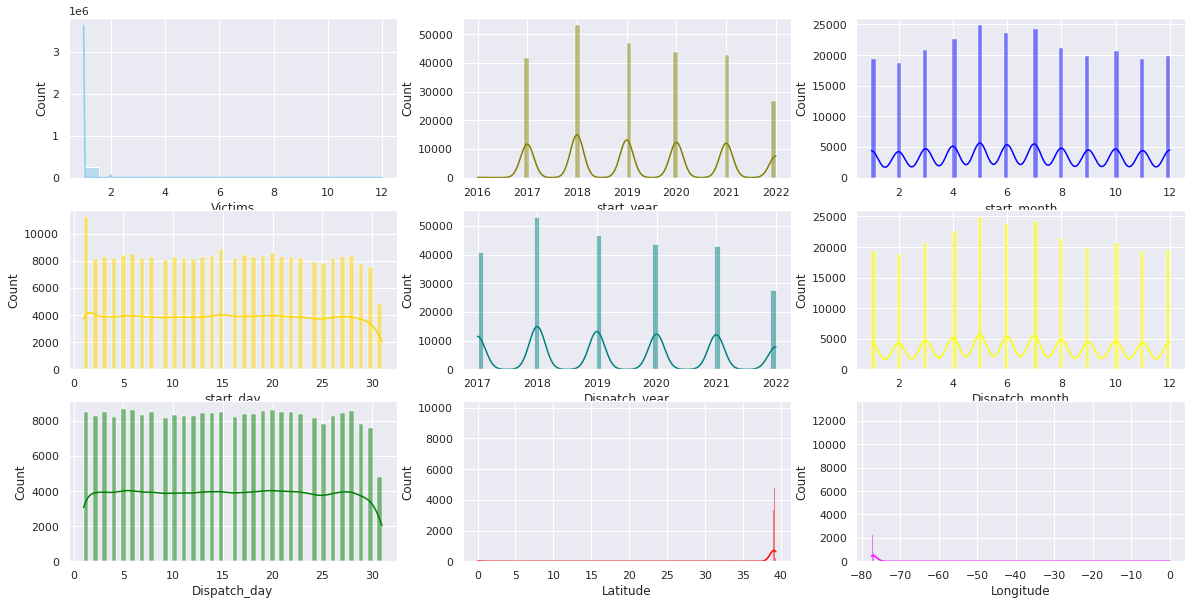

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.histplot(data=df, x="Victims", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="start_year", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="start_month", kde=True, color="blue", ax=axs[0, 2])
sns.histplot(data=df, x="start_day", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_dispatch, x="Dispatch_year", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_dispatch, x="Dispatch_month", kde=True, color="yellow", ax=axs[1, 2])
sns.histplot(data=df_dispatch, x="Dispatch_day", kde=True, color="green", ax=axs[2, 0])
sns.histplot(data=df, x="Latitude", kde=True, color="red", ax=axs[2, 1])
sns.histplot(data=df, x="Longitude", kde=True, color="magenta", ax=axs[2, 2])
plt.savefig('Distribution Plots.png')

plt.show()

## 3.5: Correlation between Features

Most of the variables in this dataset, are categorical data, or mathematically meaningless numerical variables (such as NBRS code). For category (object-type) variables, there is no simple and effective method to produce a meaningful correlation map.As a result, we are going to create a seperate correlation just for the numerical values. 

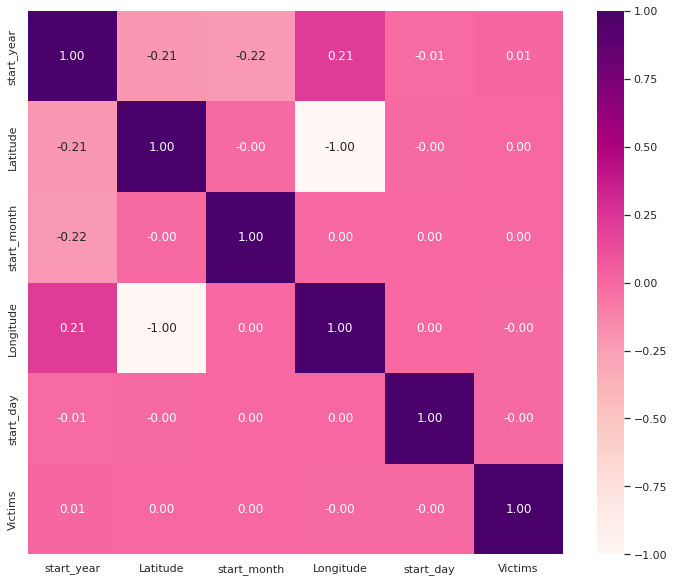

In [64]:
num_df = pd.DataFrame(data=df, columns={'Victims', 'start_year', 'start_month', 'start_day', 'Latitude', 'Longitude'})

# Creating the correlation map 
df_cor = num_df.corr()

# size of the map
sns.set_theme(rc={'figure.figsize':(12,10)})

# Plotting the heatmap: 
sns.heatmap(df_cor,annot=True,fmt='0.2f',vmin=-1,vmax=1,cmap='RdPu')
plt.savefig('corr_heatmap.png')
plt.show()

## 3.6 Final Cleaned Dataset

In [65]:
# Checking null values in the different columns
print(df.isna().sum())

Incident ID               0
Offence Code              0
CR Number                 0
NIBRS Code                0
Victims                   0
Crime Name1               0
Crime Name2               0
Crime Name3               0
Police District Name      0
City                      0
State                     0
Zip Code                  0
Agency                    0
Place                     0
Sector                    0
Beat                      0
PRA                       0
Street Name               0
Street Type               0
Start_Date_Time           0
Latitude                  0
Longitude                 0
Police District Number    0
start_date                0
start_time                0
start_year                0
start_month               0
start_day                 0
start_weekday             0
Dispatch_date             0
Dispatch_time             0
Dispatch_year             0
Dispatch_month            0
Dispatch_day              0
dtype: int64


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255036 entries, 0 to 306093
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Incident ID             255036 non-null  int64         
 1   Offence Code            255036 non-null  object        
 2   CR Number               255036 non-null  int64         
 3   NIBRS Code              255036 non-null  object        
 4   Victims                 255036 non-null  int64         
 5   Crime Name1             255036 non-null  object        
 6   Crime Name2             255036 non-null  object        
 7   Crime Name3             255036 non-null  object        
 8   Police District Name    255036 non-null  object        
 9   City                    255036 non-null  object        
 10  State                   255036 non-null  object        
 11  Zip Code                255036 non-null  float64       
 12  Agency                  255036

# 4: Data Visualisation

## 4.1: Question 1 - When do criminals often operate? Which months and days are the busiest? Are there any patterns for these crimes in terms of specific days of the month? Is there a certain month that has the highest or the least criminal activity? 

Months:

Months in %:
5     0.097461
7     0.095030
6     0.092752
4     0.088662
8     0.083090
3     0.081396
10    0.080765
9     0.078087
12    0.077538
11    0.076150
1     0.075993
2     0.073076
Name: start_month, dtype: float64


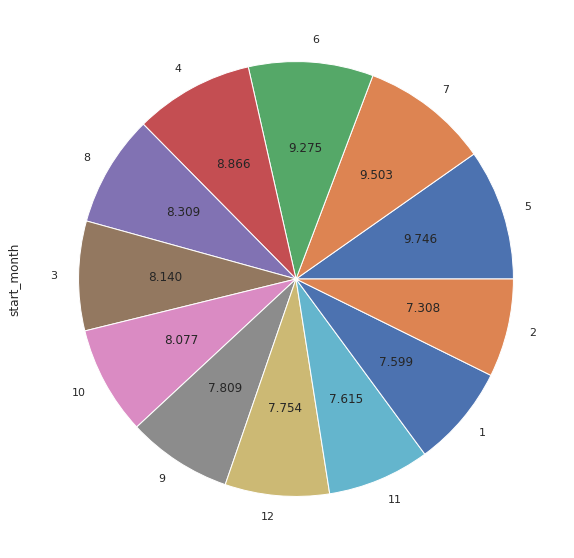

In [67]:
# Lets first analyze the months and see what trends we can find in there
# normalize = True will normalize the data and give us percentage
print('Months in %:')
print(df['start_month'].value_counts(normalize=True))
df['start_month'].value_counts(normalize=True).plot.pie( autopct='%.3f')
plt.show()

Insights:

For months, we have used a pie chart. This shows what percentage of crimes are in each month. This shows us the most active month is May which has criminal activities of around 9.7% and the least active month is February where around 7.3% of total crimes were committed.

May is usually the start of Summer in Maryland and pretty popular time for Tourists, this might be increasing the opportunities for criminals. Whereas, February is the peak Winter season and people might not be going out much during this period, hence less number of crimes.

Days:

<AxesSubplot:title={'center':'Day'}>

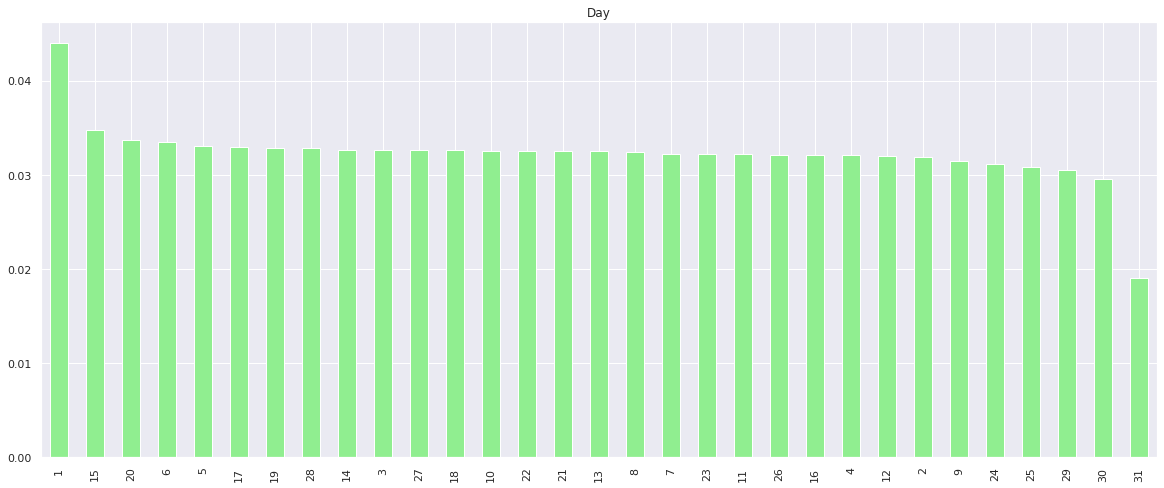

In [68]:
plt.figure(figsize=(20,8))
df['start_day'].value_counts(normalize=True).plot(kind = 'bar', title = "Day",  color='lightgreen')

Insights:
* Most active day is 1st
* Least active day is 31st

This could be a result of the common lifestyle of a human, where we tend to go shopping or stepping out after the salary is credited at the starting of a month. By the end of the month, these activities tend to reduce as we wait for the next salary, and plan things for the coming month. This could be leading to lessar crime incidents towards the end of a month.

## 4.2: Question 2 - Which crime type has the most affected victims?

Crime Name1:

Crime category-1 in %:
Crime Against Property    0.467432
Other                     0.209739
Crime Against Society     0.209715
Crime Against Person      0.101331
Not a Crime               0.011783
Name: Crime Name1, dtype: float64


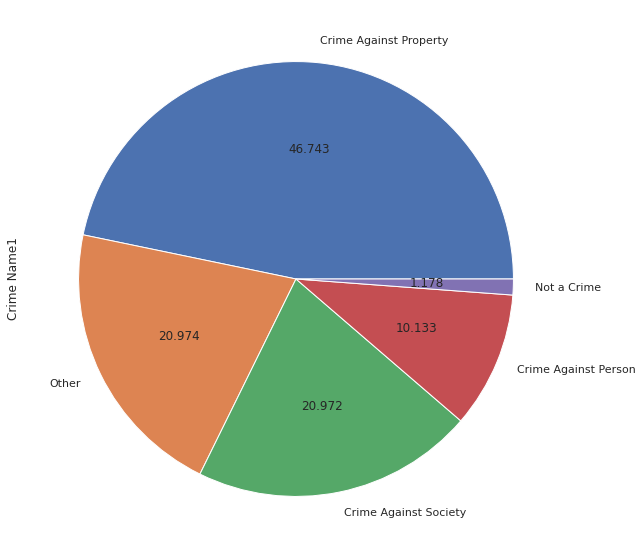

In [69]:
#df['Crime Name1'].value_counts(normalize=True).plot(kind = 'bar', title = "Crime Name1")
# normalizing the values shows the graph in percentages
print('Crime category-1 in %:')
print(df['Crime Name1'].value_counts(normalize=True))
df['Crime Name1'].value_counts(normalize=True).plot.pie( autopct='%.3f')
plt.show()

Insights:
* Crime Against Property is the most commited crime in Crime Name1 almost 46.8%
* The least amount of crimes commited are those that aren't even considered as crime. In this case 'Not a Crime' around 0.01%

Crime Name2:

<AxesSubplot:title={'center':'Crime 2'}>

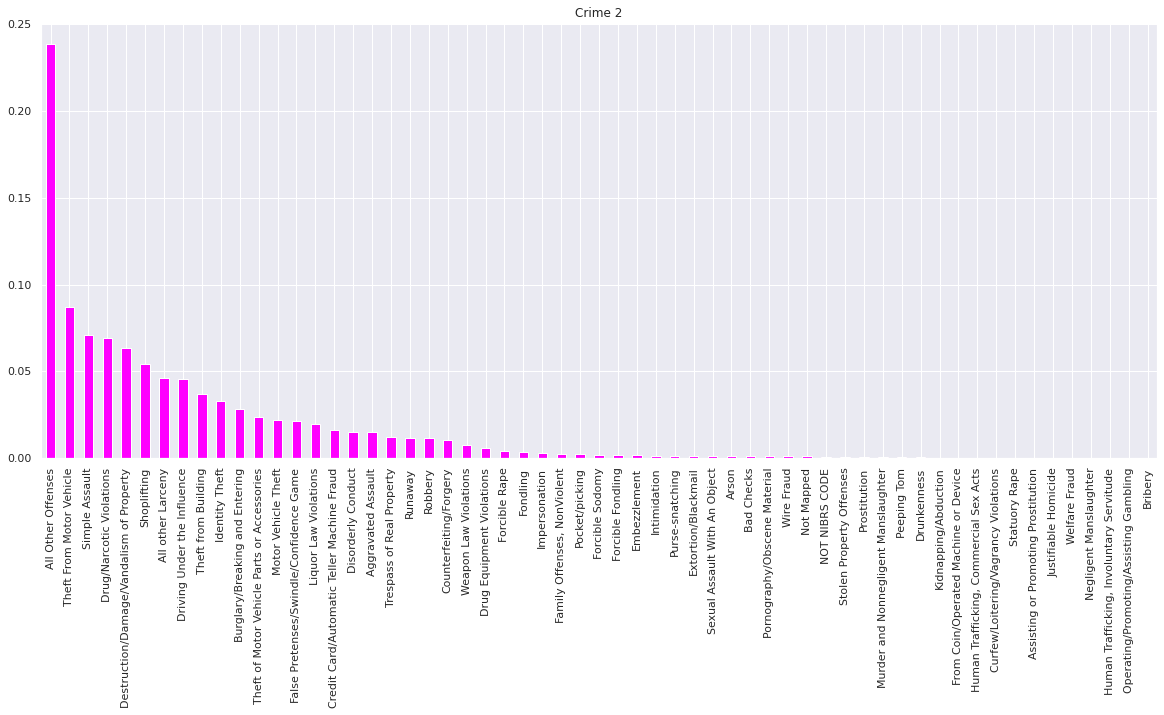

In [70]:
plt.figure(figsize=(20,8))
df['Crime Name2'].value_counts(normalize=True).plot(kind = 'bar', title = "Crime 2", color='magenta')

In [71]:
print('Crime category-2 in %:')
print(df['Crime Name2'].value_counts(normalize=True))

Crime category-2 in %:
All Other Offenses                             0.238700
Theft From Motor Vehicle                       0.086800
Simple Assault                                 0.071170
Drug/Narcotic Violations                       0.069347
Destruction/Damage/Vandalism of Property       0.063234
Shoplifting                                    0.054439
All other Larceny                              0.046044
Driving Under the Influence                    0.045288
Theft from Building                            0.036944
Identity Theft                                 0.032701
Burglary/Breaking and Entering                 0.028447
Theft of Motor Vehicle Parts or Accessories    0.023593
Motor Vehicle Theft                            0.022052
False Pretenses/Swindle/Confidence Game        0.021597
Liquor Law Violations                          0.019809
Credit Card/Automatic Teller Machine Fraud     0.015888
Disorderly Conduct                             0.015010
Aggravated Assault       

Insights:

*   Most commited crime in Crime Name2 list is 'All Other Offenses' around 23.8% of total data. These are the crimes that are not categorized in a particular category. 
*   Least commited crimes in this list is 'Bribery' and 'Operating/Promoting/Assisting Gambling', have around 0.00004%.
*   Sub-category of 'Not a crime' from Crime Name1 list is 'Runaway' in this list that comprises of almost 1% records shown in the graph.

Crime Name3:

<AxesSubplot:title={'center':'Crime 3'}>

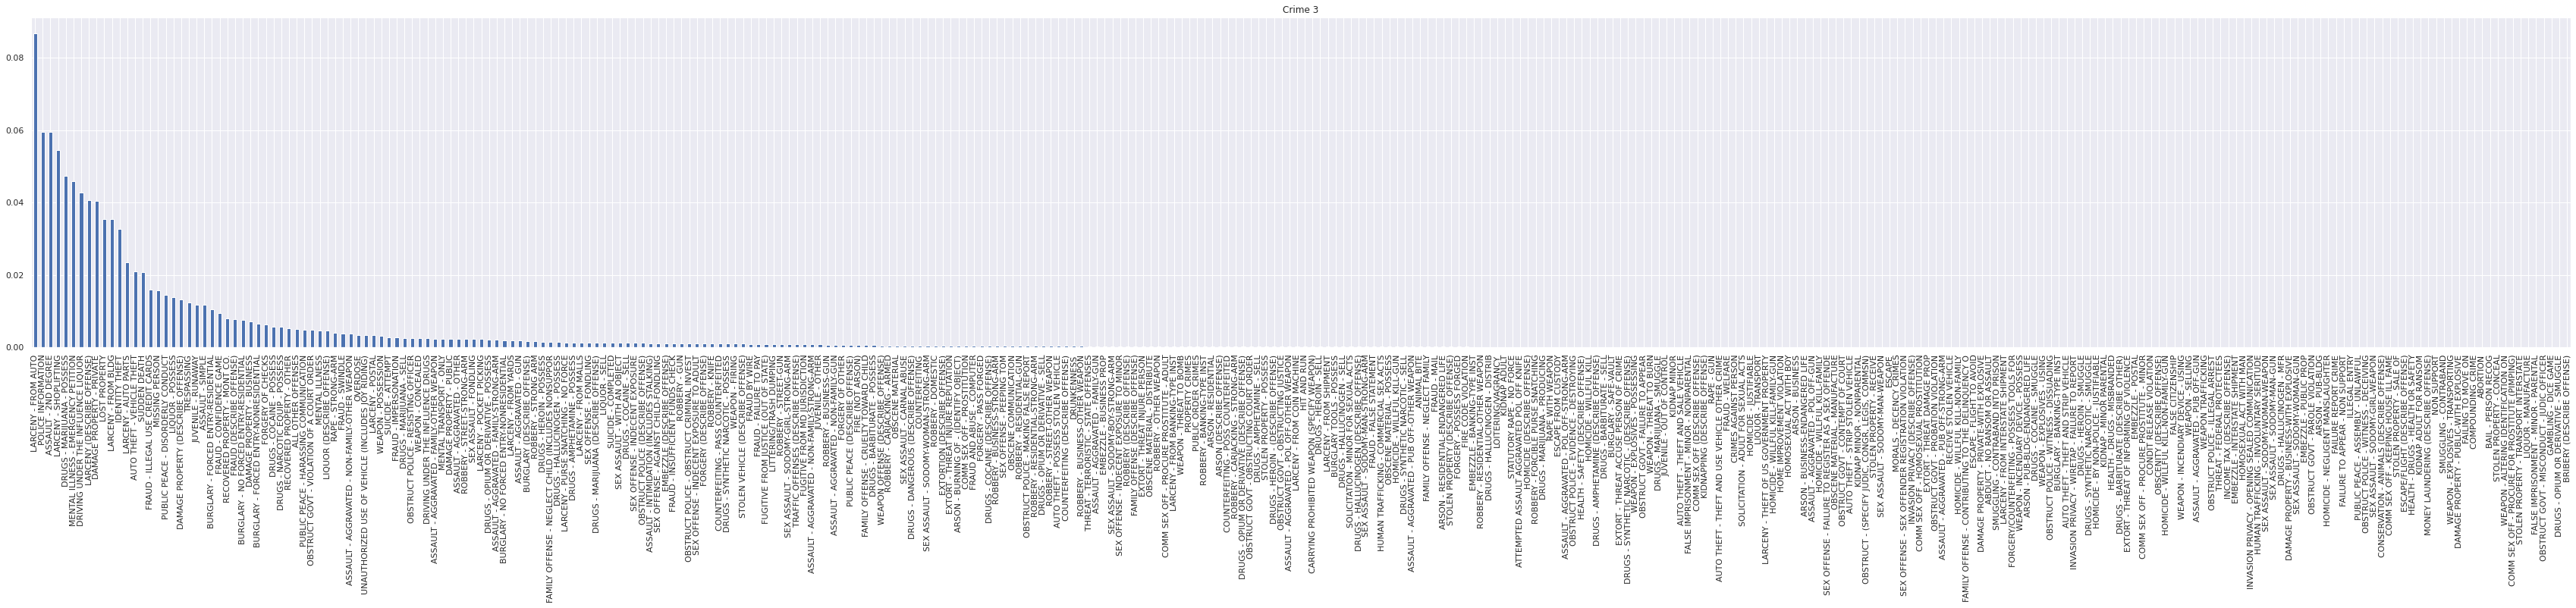

In [72]:
plt.figure(figsize=(60,8))
df['Crime Name3'].value_counts(normalize=True).plot(kind = 'bar', title = "Crime 3")

In [73]:
print('Crime category-3 in %:')
print(df['Crime Name3'].value_counts(normalize=True))

Crime category-3 in %:
LARCENY - FROM AUTO                           0.086800
POLICE INFORMATION                            0.059556
ASSAULT - 2ND DEGREE                          0.059470
LARCENY - SHOPLIFTING                         0.054439
DRUGS - MARIJUANA - POSSESS                   0.047429
                                                ...   
FALSE IMPRISONMENT - MINOR - PARENTAL         0.000004
OBSTRUCT GOVT - MISCONDUCT - JUDIC OFFICER    0.000004
GAMBLING - DICE GAME                          0.000004
DRUGS - OPIUM OR DERIVATIVE - SMUGGLE         0.000004
BRIBERY (DESCRIBE OFFENSE)                    0.000004
Name: Crime Name3, Length: 330, dtype: float64


Insights:
* Most commited crimes in this list is 'Larceny from Auto' around 8.6%
* Least commited crime are 'BRIBERY (DESCRIBE OFFENSE) ', 'DRUGS - OPIUM OR DERIVATIVE - SMUGGLE', 'GAMBLING - DICE GAME', 'OBSTRUCT GOVT - MISCONDUCT - JUDIC OFFICER' and 'FALSE IMPRISONMENT - MINOR - PARENTAL' all of them around 0.00004%


## 4.3: Question 3 - For each type of crime, which places are considered the most dangerous/safest?

The grouped count bar chart allows us to show the relationship between two categorical features in one figure. Places consist of a high number of categories in this dataset, but by creating separate data frames based on the count values of crimes on each place and using `head()` method, we can find the most dangerous places, in which diffrent types of crimes happenes. By using the `hue = 'Place'` on these count bar charts, we can show the values of crimes, where colours distinguish places parameter.




In [74]:
#As the number of places are too high , lets find the 10 most dengerous place types
df_HP = df['Place'].value_counts().head(10)
#By using .index.tolist() method we can have a list of the 10 most dengerous place types
df_HP = df_HP.index.tolist()
#lets find wich records are included in this list regarding the place type
df_highplace = df.loc[df['Place'].isin (df_HP)]

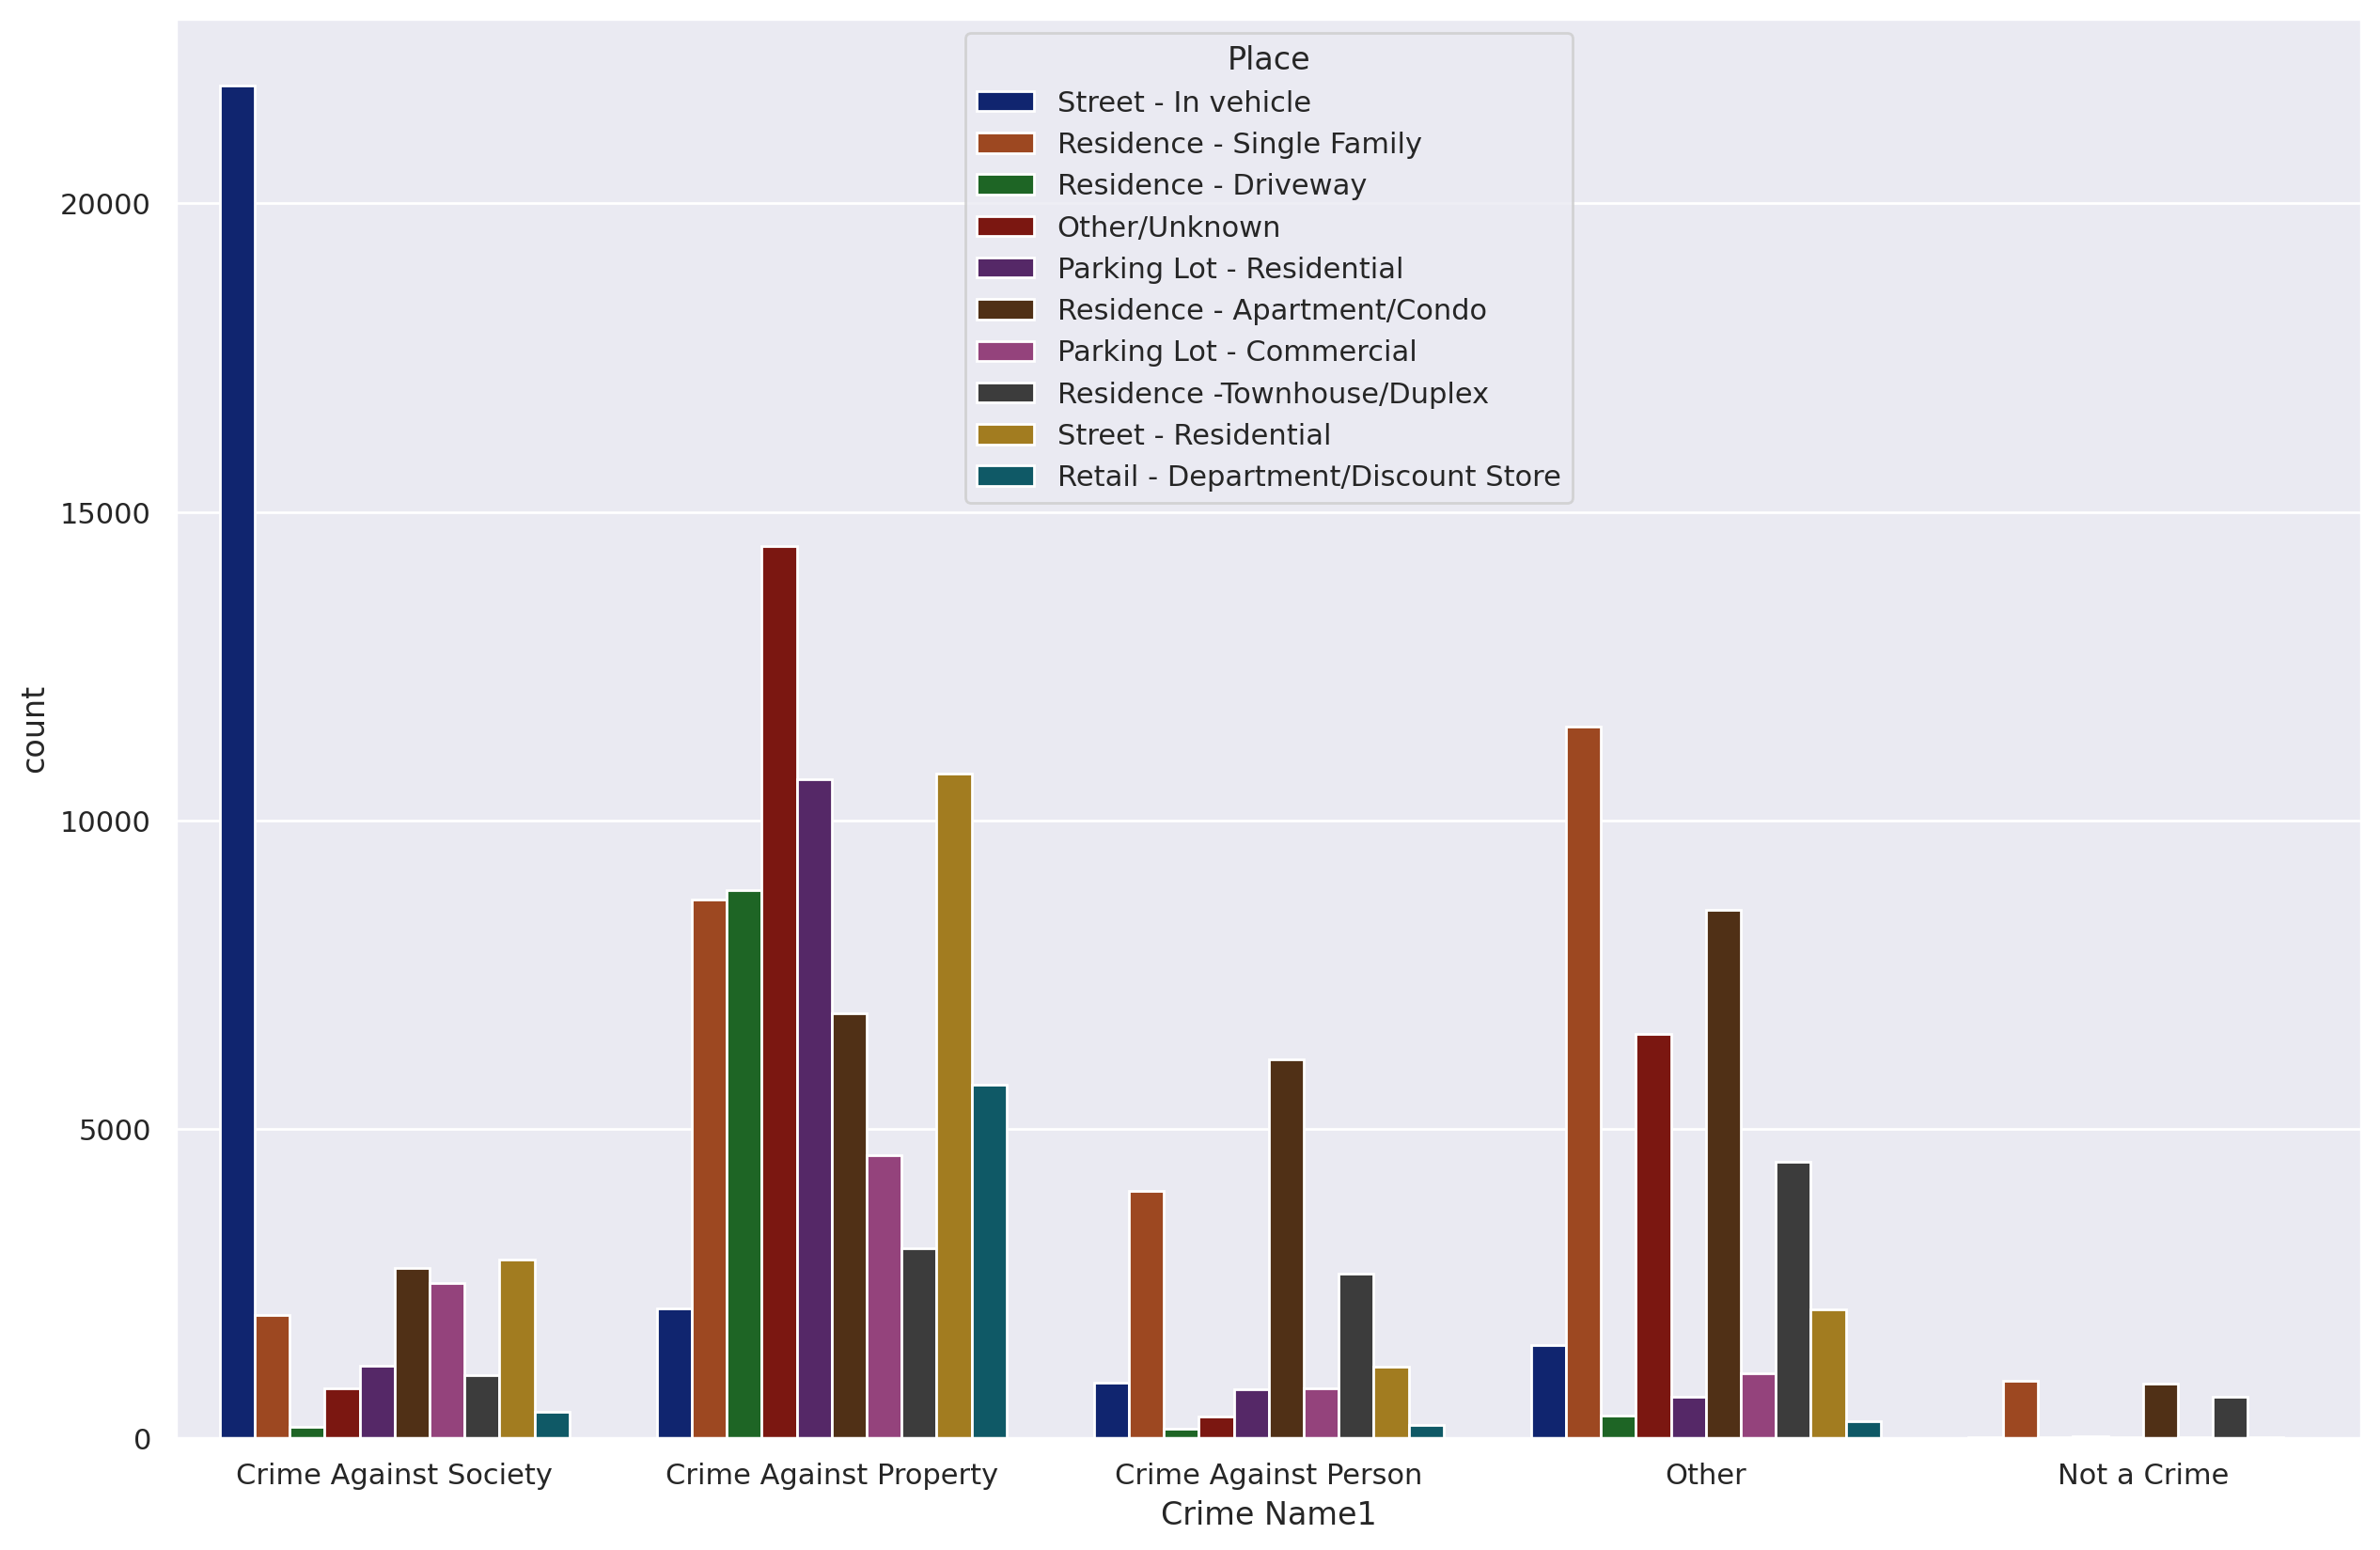

In [75]:
#The countplot, which is in the format of barchart gives us a better format of visualisation 
plt.figure(figsize = (15,10), dpi=200)
sns.countplot(data = df_highplace, x= 'Crime Name1', hue = 'Place', palette= 'dark')
plt.savefig('Crime1_most denger_places.png')

Insights:

Using this plot, we can conclude that most “Crimes Against Society” occur on the street, in a person's vehicle, thus making it very important for individuals to adhere to safety protocols when they are in their vehicles. Likewise, for “Crime Against Property” besides the unknown places, again, streets and parking Lots are considered as vulnerable places. Moreover, most of the “Crime against Person” happens in their apartments.

In [76]:
#As the number of places are too high , lets find the 10 most dengerous place types
df_tP = df['Place'].value_counts().tail(10)
#By using .index.tolist() method we can have a list of the 10 most dengerous place types
df_tP = df_tP.index.tolist()
#lets find wich records are included in this list regarding the place type
df_lowplace = df.loc[df['Place'].isin (df_tP)]

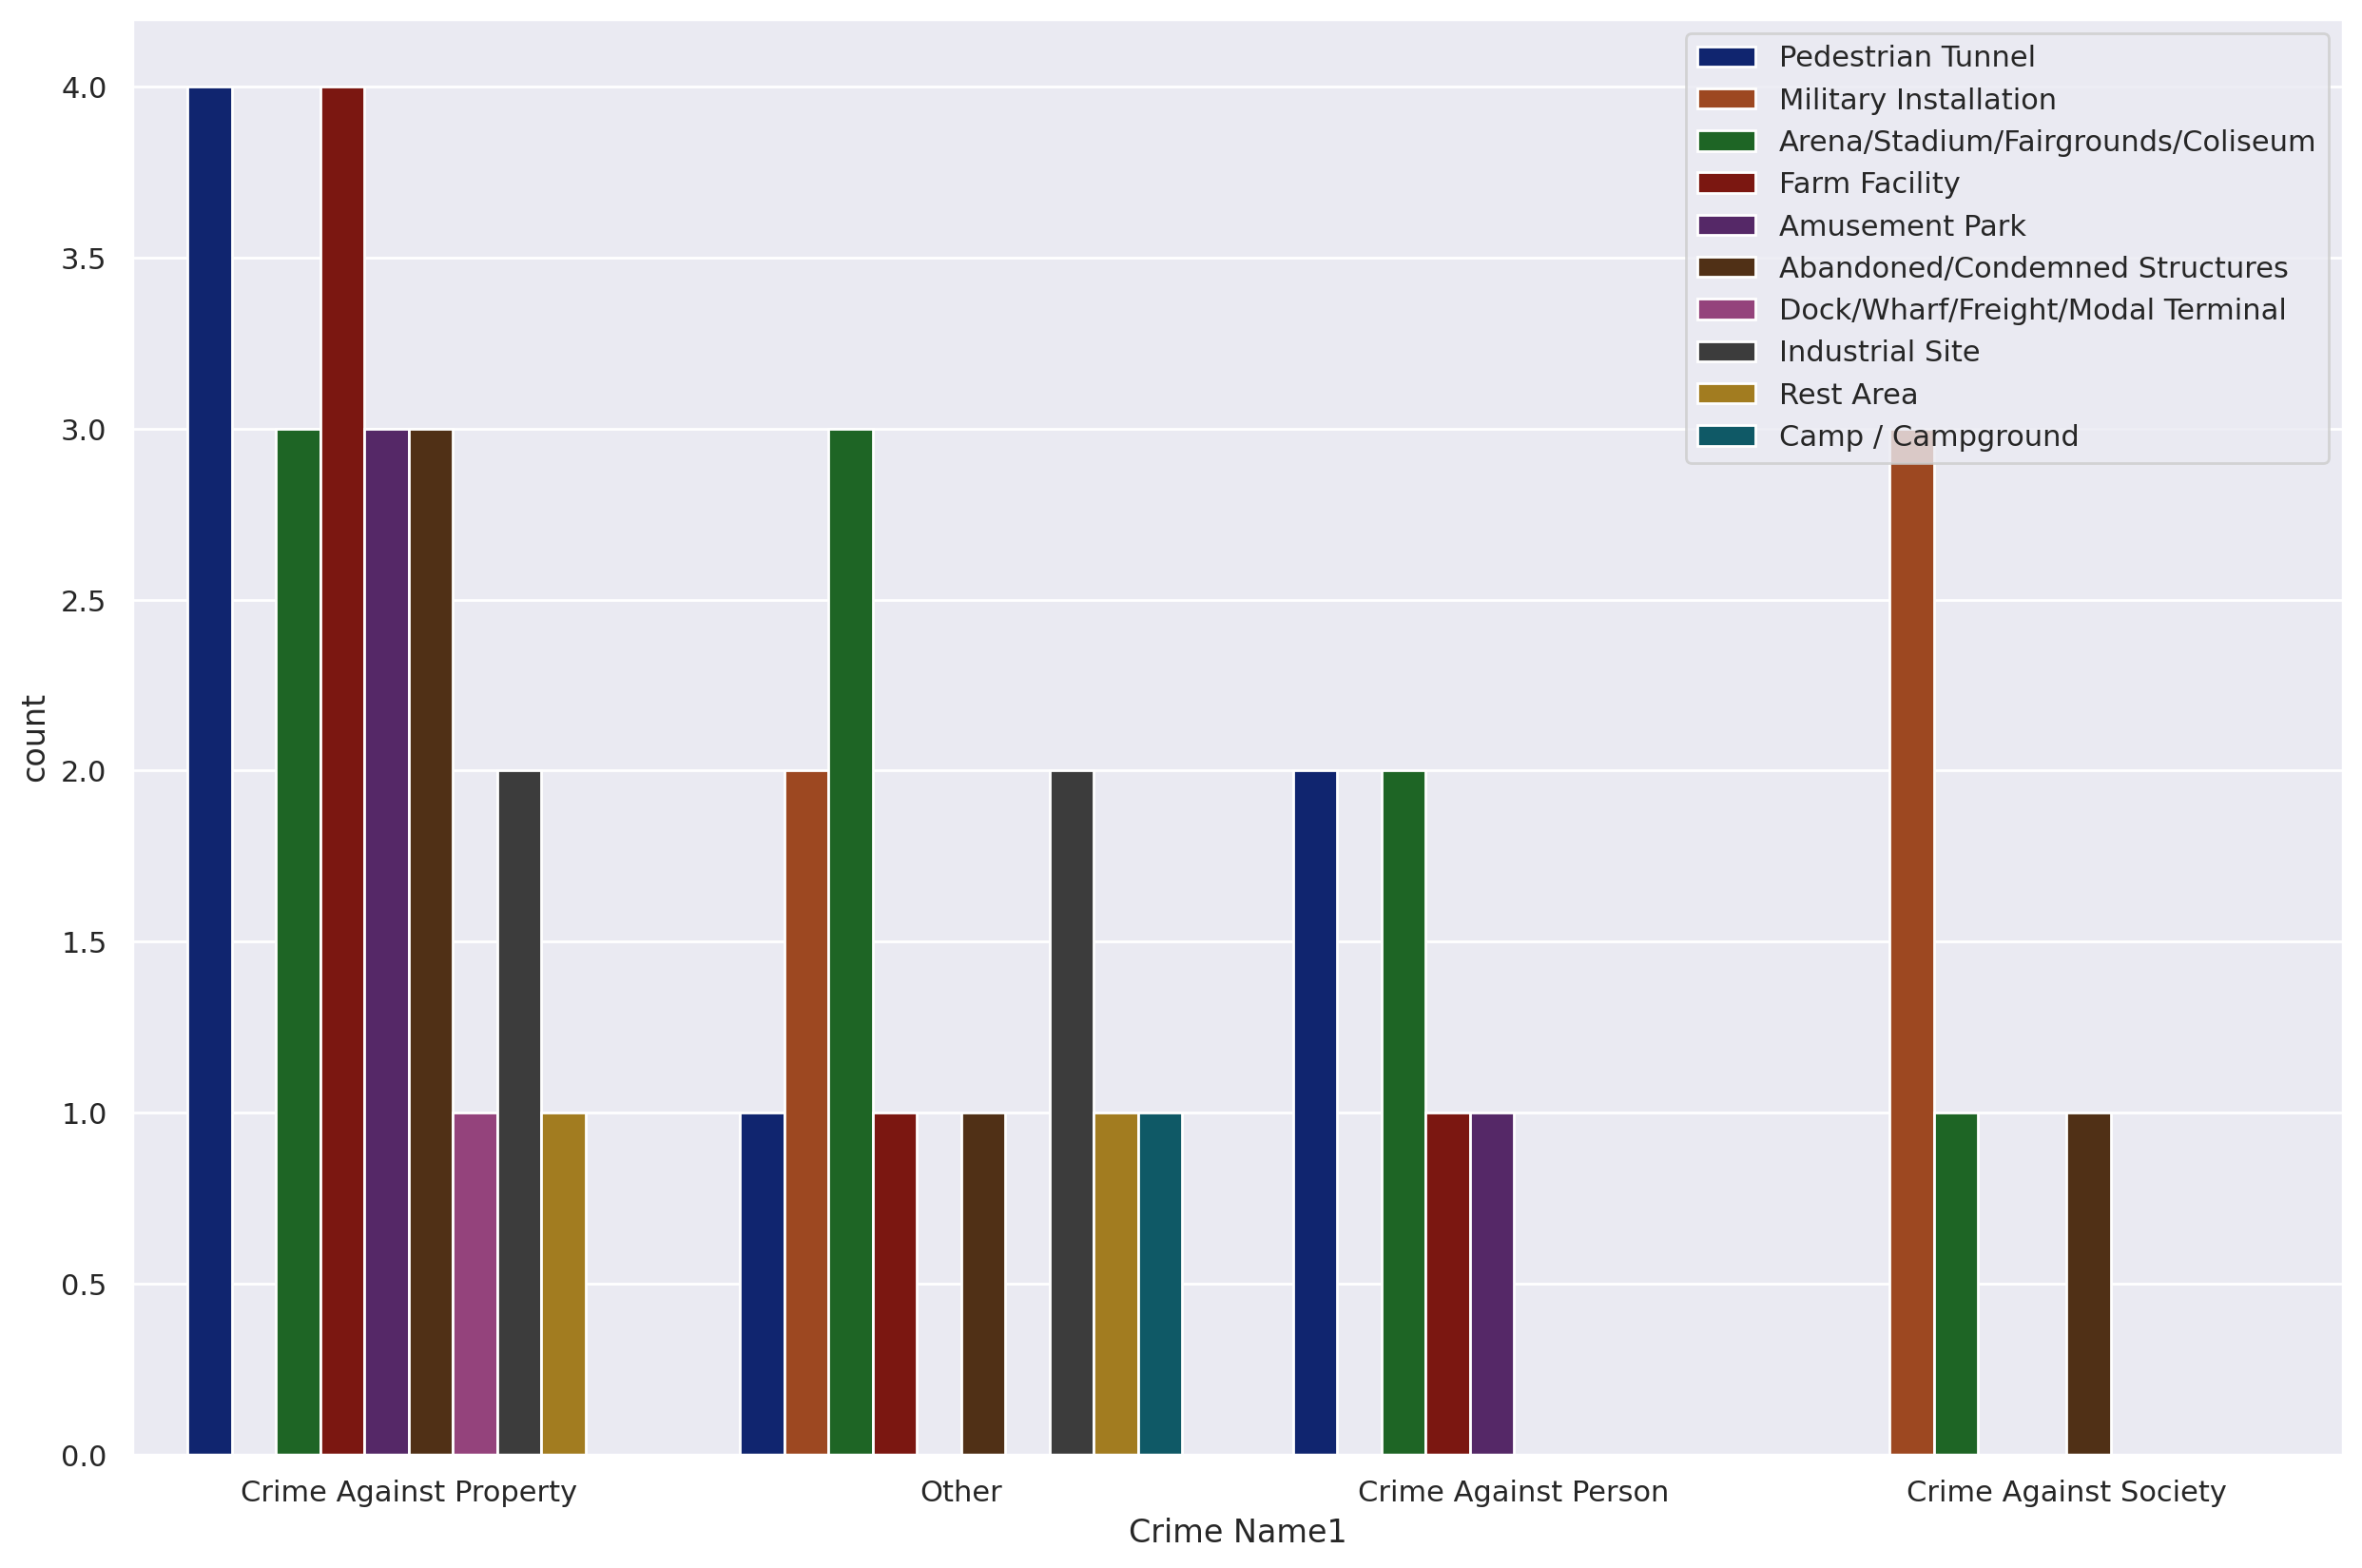

In [77]:
#The countplot, which is in the format of barchart gives us a better format of visualisation
plt.figure(figsize = (15,10), dpi=200)
sns.countplot(data = df_lowplace, x= 'Crime Name1', hue = 'Place', palette= 'dark')
plt.legend(loc='upper right')
plt.savefig('safest places_3.png')

## 4.4: - Which police district deals with the highest and lowest number of crimes every year?

- A subset dataframe of the original dataframe called crime1_yearly is created which contains the data of police district counts grouped by year. A stacked bar plot is plotted using this dataframe.
- Looking at the graph below, it is clear that 'City of Takoma Park' deals with the least number of crimes, even zero crimes in the year 2022 and 'Silver Spring' district deals with consistently higher number of crimes every year between 2016 - 2022.

In [78]:
#crime1_yearly is a subset dataframe of the given data frame, which has count of police district names grouped by each year.
crime1_yearly = df.groupby('start_year')['Police District Name'].value_counts().unstack()
print(crime1_yearly)

Police District Name  BETHESDA  CITY OF TAKOMA PARK  GERMANTOWN  \
start_year                                                        
2016                      49.0                  4.0        25.0   
2017                    5438.0                912.0      5333.0   
2018                    7125.0               1079.0      7134.0   
2019                    6669.0               1099.0      5638.0   
2020                    6356.0               1036.0      5668.0   
2021                    6599.0                613.0      5790.0   
2022                    4189.0                  NaN      3512.0   

Police District Name  MONTGOMERY VILLAGE  OTHER  ROCKVILLE  SILVER SPRING  \
start_year                                                                  
2016                                51.0    NaN       47.0           46.0   
2017                              7194.0    NaN     5582.0         8916.0   
2018                              8763.0    NaN     7088.0        11193.0   
2019       

Text(0.5, 1.0, 'Crime count based on police district name - year wise')

<Figure size 1008x864 with 0 Axes>

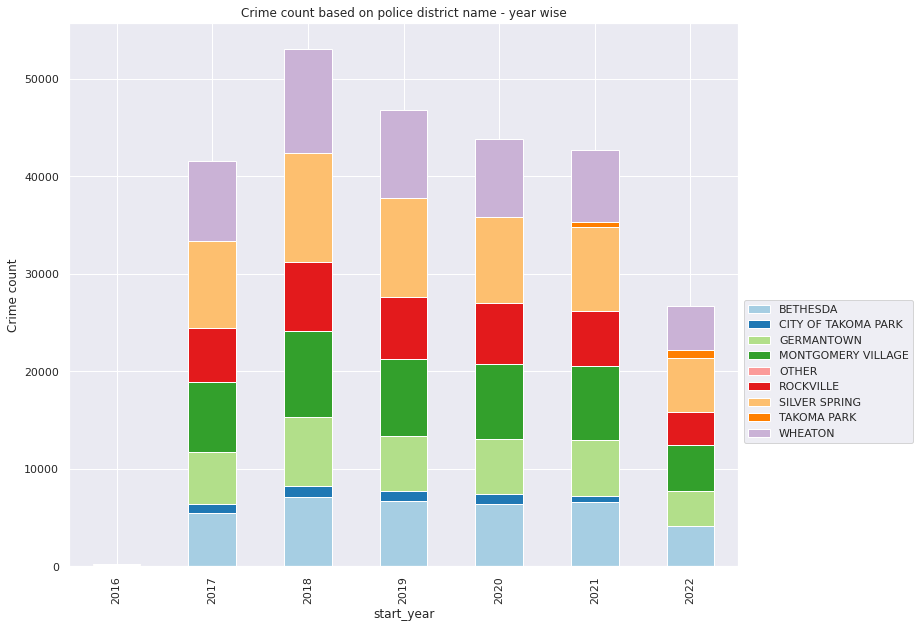

In [79]:
#The stacked bar chart is plotted using the 'crime1_yearly' sub-dataframe.
plt.figure(figsize=(14,12))
colors = sns.color_palette("Paired", n_colors=9)
crime1_yearly.plot.bar(ylabel='Crime count',stacked=True,color=colors)
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('Crime count based on police district name - year wise')

## 4.5: Question 5 - Which police departments are quickest to respond?

- Each crime record in the dataset contains information about the start time of a crime, as well as the dispatch time of an officer. This information can be helpful to identify the average reponse time for the reported crimes by the different Police Districts.
- These details can help identify Police Districts displaying discrepancies in the time taken to act on a reported crime or vigilance. It will also create an opportunity to compare response time the other Police Districts and make improvements accordingly.

In [80]:
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
df_dispatch_date_time['Dispatch Date / Time'] = pd.to_datetime(df_dispatch_date_time['Dispatch Date / Time'])

# Get the time taken between when the crime was reported and an officer was dispatched
# This is possible by getting the difference between Start_Date_Time and Dispatch Date / Time

df['Response_Time'] = (df_dispatch_date_time['Dispatch Date / Time']-df['Start_Date_Time'])

# Convert the Response_Time into absolute values (as -ve time doesn't mean anything) and the unit into hours
df['Response_Time'] = np.absolute(df['Response_Time'].apply(lambda x : x.total_seconds()/3600)) # 1 hr = 60 min = 3600 sec

# Round off the Response_Time values to 2 decimal points
df['Response_Time'] = np.round(df['Response_Time'], 2)

# Get the required dataframe and plot
df_police_response_time = df.groupby('Police District Name')[['Police District Name','Response_Time']].mean()
df_police_response_time = df_police_response_time.sort_values('Response_Time') # Sort the Police District Names according to Response Time
print(df_police_response_time)

                      Response_Time
Police District Name               
OTHER                     17.512500
TAKOMA PARK               91.069905
CITY OF TAKOMA PARK      102.190660
SILVER SPRING            147.774477
GERMANTOWN               175.933565
WHEATON                  183.785669
MONTGOMERY VILLAGE       197.118231
BETHESDA                 247.887323
ROCKVILLE                296.941593


<AxesSubplot:xlabel='Police District Name', ylabel='Response_Time'>

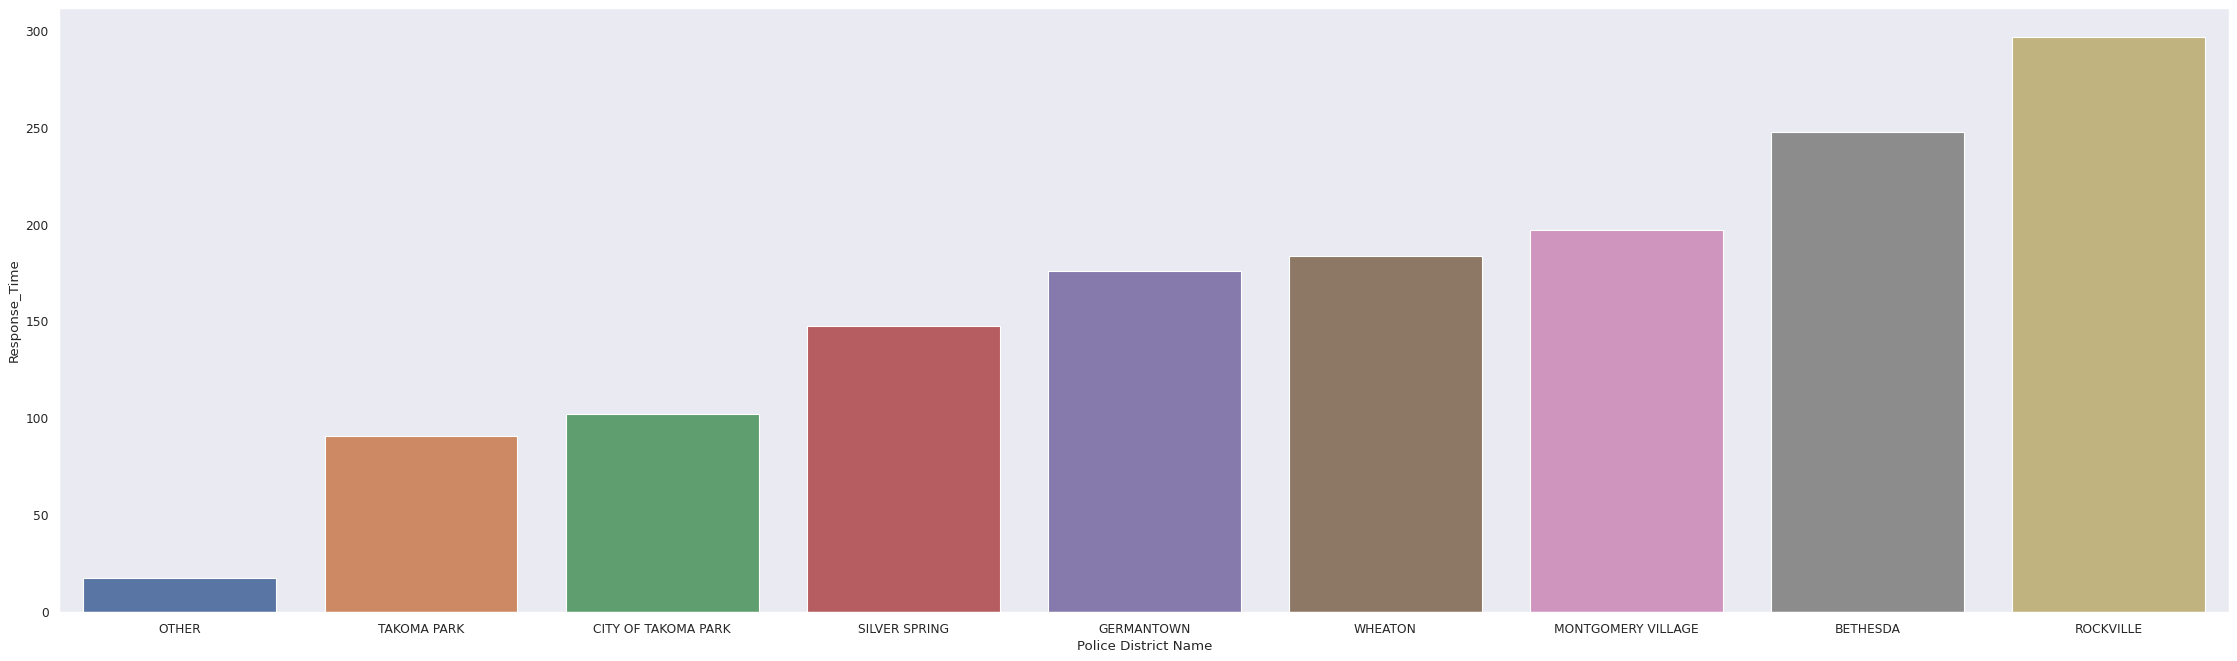

In [81]:
plt.figure(figsize=(35,10), dpi=80)
plt.grid()
sns.barplot(data=df_police_response_time.reset_index(), x='Police District Name', y='Response_Time')

Insights:

ROCKVILLE and BETHESDA were the slowest to respond while TAKOMA PARK and OTHER were the fastest to respond.

## 4.6: Question 6 -  What is the frequency of each crime based on a year? 


<AxesSubplot:title={'center':'Year'}>

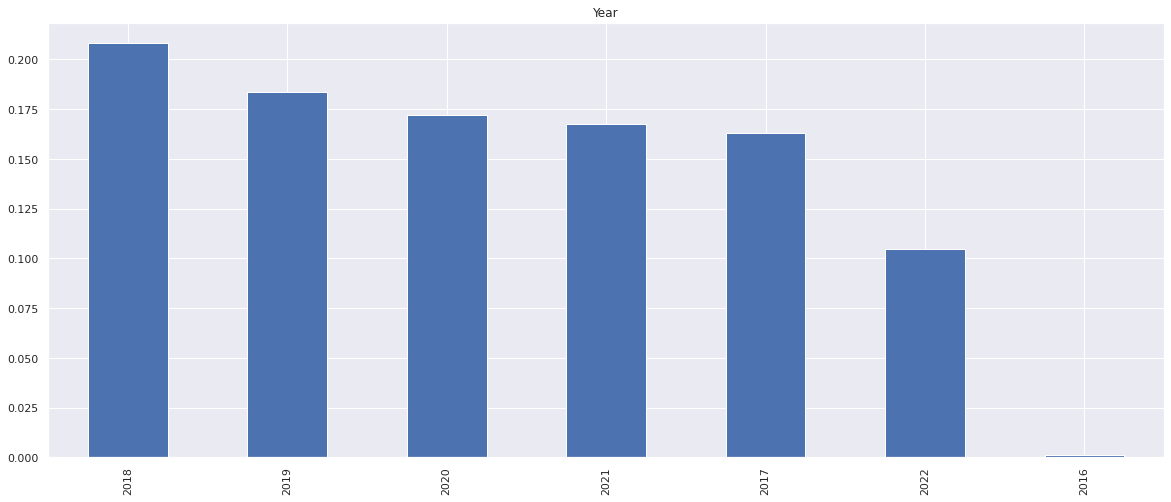

In [82]:
plt.figure(figsize=(20,8))
df['start_year'].value_counts(normalize=True).plot(kind = 'bar', title = "Year")

In [83]:
print('Year in %:')
print(df['start_year'].value_counts(normalize=True))

Year in %:
2018    0.208135
2019    0.183688
2020    0.171940
2021    0.167490
2017    0.162942
2022    0.104766
2016    0.001039
Name: start_year, dtype: float64


Insights:
* Most active year in this dataset is 2018 upto 20.8%
* Least active year for crimes is 2016 upto 0.001%

This could be because the dataset actually contains all crimes reported from 1st July 2016 onwards till date. Hence, the number of crime records for 2016 could be less. We can see a downward trend from 2018 till 2022 so far, crimes have reduced over the years.

## 4.7: Question 7 -  Which time of the day is the most active for criminals in the county?


Using bar chart, it is easier to compare the number of crimes taking place during day or night, that each police district is handling. Based on the output, the following conclusions can be made:
- Crime count is relatively high during the night across all the police districts.
- Comparison among the police districts shows that 'Silver Spring' handles the most number of crimes at night.

In [84]:
# This function identifies the time of the day based on the hour of the start date time column
def identify_day_or_night(start_date_time):
    hr, mi = (start_date_time.hour, start_date_time.minute)
    if hr>=7 and hr<18:
      return "Day"
    else:
      return "Night"

In [85]:
# A new column is created which has the information if the crime has occured during day or night.
df['Day/Night']=df['Start_Date_Time'].apply(identify_day_or_night)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'GERMANTOWN'),
  Text(1, 0, 'BETHESDA'),
  Text(2, 0, 'MONTGOMERY VILLAGE'),
  Text(3, 0, 'ROCKVILLE'),
  Text(4, 0, 'SILVER SPRING'),
  Text(5, 0, 'WHEATON'),
  Text(6, 0, 'CITY OF TAKOMA PARK'),
  Text(7, 0, 'TAKOMA PARK'),
  Text(8, 0, 'OTHER')])

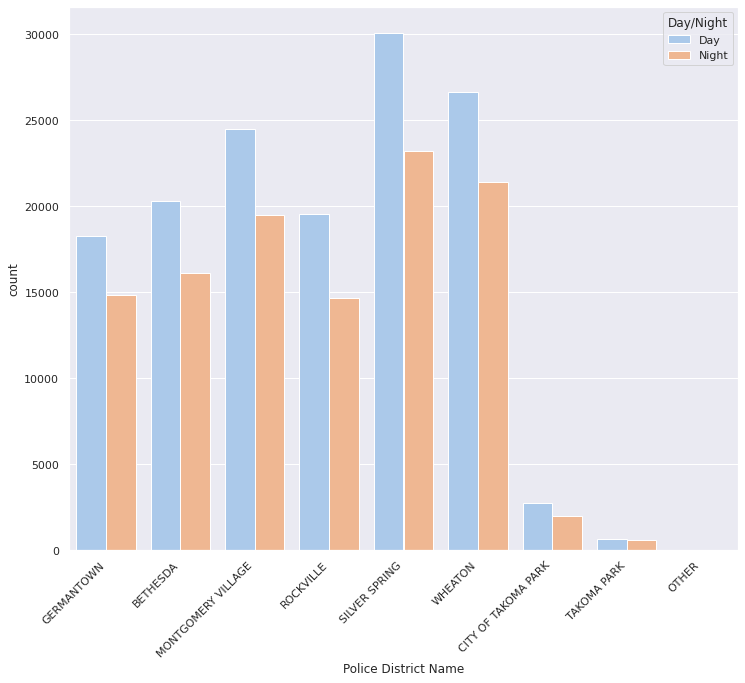

In [86]:
# The plot shows the comparison of the number of crimes each police district is dealing, based on the time of the day.
plt.figure.figsize=(20,10)
sns.countplot(x=df['Police District Name'],hue=df['Day/Night'],palette='pastel')
plt.xticks(rotation=45, ha="right")

## 4.8: Question 8 - What are the hotspot locations for criminal activities in Montgomery County?

- An overview of areas in the Montgomery County that are being targeted by criminal can be a crucial visualisation for the Police and Government Officials. It can help to dispatch forces for patrolling in the hotspots, make strategies or analyse the reports further. Additionally it provides colour gradient contours of such on geographical maps to clearly identify the locations alongwith crimes rates where red colour identifies such hotspots.

In [31]:
df_lat_long = pd.read_csv('Crime_cleaned.csv', low_memory=False)
# Remove records where city is '0'
df_lat_long.drop(df_lat_long.index[df_lat_long['City'] == '0'], inplace=True)
# Get the required dataframe and plot
df_hotspot_locations = df_lat_long.groupby('City').agg({'Latitude':'mean','Longitude':'mean','City':'count'}).rename(columns={'City':'Count'})
print(df_hotspot_locations)

# Get all the locations and crime counts into a list
lats_longs = df_hotspot_locations.loc[:,:].values.tolist()

map_obj = folium.Map(location = [39.50470797800558, -77.2923626782645], zoom_start = 7) # Start with Maryland as centre

HeatMap(lats_longs).add_to(map_obj)

map_obj

                   Latitude  Longitude  Count
City                                         
ADELPHI           39.003106 -76.973886      4
ALEXANDRIA        39.086040 -77.153100      1
ASHTON            39.148683 -77.008830    419
ASPEN HILL        39.082081 -77.073468     50
BARNESVILLE       39.221735 -77.374768     48
...                     ...        ...    ...
WASHINGTON GROVE  39.138525 -77.175105     10
WEST FRIENDSHIP   39.303452 -76.953790      1
WHEATON           39.039766 -77.056377     14
WHITE OAK         39.048313 -76.980464      2
WOODBINE          39.277579 -77.140837      7

[76 rows x 3 columns]


Insights :

This is a great interactive visual for the Police and Government Authorities to see the hotspot locations. Red parts are the ones with high crime rates, whereas as we move outwards to orange, yellow, green and blue the crimes reduce.

## 4.9: Question 9 -  What is the relationship between the weekdays and the number of crimes?

Both charts will give us a nice visualisation, although the diffrences are more clear and recognizable in the barchar.
we can see that in the fridays, we have the most number of crimes, as it is the day before the weekends, and most of the people will stay out late. Also, in sundays, we have the least number of crimes, as it is the fisrt day befor the week starts, so people would goo sooner, and commited less crimes. 

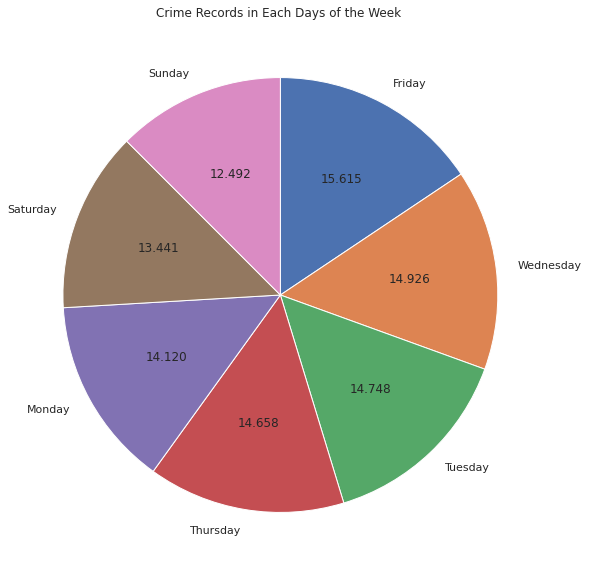

In [88]:
# The distribition of the number of crimes on the weekdays, can be visualised in the form of pie chart
sorted_counts = df["start_weekday"].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%.3f')
plt.title('Crime Records in Each Days of the Week ')
plt.savefig('weekdays.png')

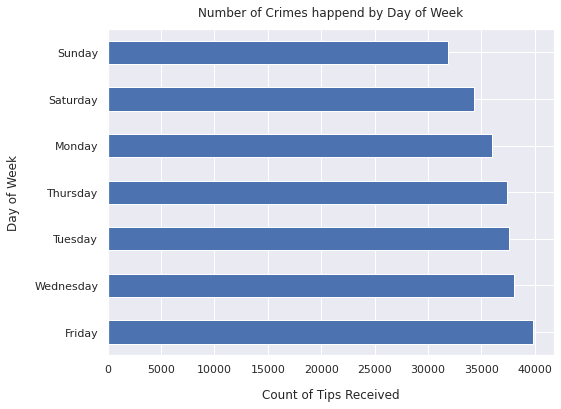

In [89]:
df['start_weekday'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of Tips Received", labelpad=14)
plt.ylabel("Day of Week", labelpad=14)
plt.title("Number of Crimes happend by Day of Week", y=1.02);
plt.savefig('weekdays_for now.png')

Insights:

Friday has the most number of crimes associated probably because that's when most of the people go out to party or leisure time or shopping. This creates an opportunity for the crimes. On the other hand, most of the people spending time at home on Sunday, as they also need to start wokring on Monday. Hence, Sunday has the least number of crimes reported.

## 4.10: Question 10 -  Which cities are considered the safest and the most dangerous ones in terms of the  number of crimes?

Each crime record in the dataset is accompanied by the city where it occurred. As a result of the records gathered in the defined period of time, this question aims to find the most dangerous and safest cities in the dataset. We can create an array of city names and the recorded crimes for each by using the `value_counts()` method, and convert it to a dataframe by using `to_frame()`.
To visualise this information, we can use a bar chart, to plot the counted values for each city.

In [90]:
a = df['City'].value_counts().to_frame()
a = a.reset_index()
#Changing the columns name to a meaningfull format
a.rename(columns={'index': 'City', 'City': 'Crimes'}, inplace=True)
print(a)
print(type(a))

                  City  Crimes
0        SILVER SPRING   88074
1         GAITHERSBURG   36582
2            ROCKVILLE   35956
3           GERMANTOWN   25314
4             BETHESDA   17986
5   MONTGOMERY VILLAGE    7826
6          TAKOMA PARK    7124
7          CHEVY CHASE    5394
8              POTOMAC    5372
9              DERWOOD    4631
10          KENSINGTON    4104
11               OLNEY    3901
12        BURTONSVILLE    3122
13          CLARKSBURG    2725
14            DAMASCUS    2111
15               BOYDS    1674
16         BROOKEVILLE     779
17         POOLESVILLE     736
18        SANDY SPRING     343
19              ASHTON     300
20           DICKERSON     253
21          CABIN JOHN     197
22        SPENCERVILLE     113
23           GLEN ECHO      74
24            BRINKLOW      61
25          MOUNT AIRY      58
26         BARNESVILLE      43
27         BEALLSVILLE      39
28              LAUREL      36
29             MT AIRY      19
30        GARRETT PARK      16
31      

First we use the `sort_values` on the created dataframe based on the number of crimes, and then we use barplot To visualise the most dengerous and safest citie. 
As it is presented **SILVER SPRING**, which is in red, has the most number Of crimes in the dataset, and can be considered as the most dengerous city in Maryland county. 


In [91]:
top10_crime = a.sort_values('Crimes',ascending=False)[:10].reset_index(drop=True)
top10_crime

,City,Crimes
0,SILVER SPRING,88074
1,GAITHERSBURG,36582
2,ROCKVILLE,35956
3,GERMANTOWN,25314
4,BETHESDA,17986
5,MONTGOMERY VILLAGE,7826
6,TAKOMA PARK,7124
7,CHEVY CHASE,5394
8,POTOMAC,5372
9,DERWOOD,4631


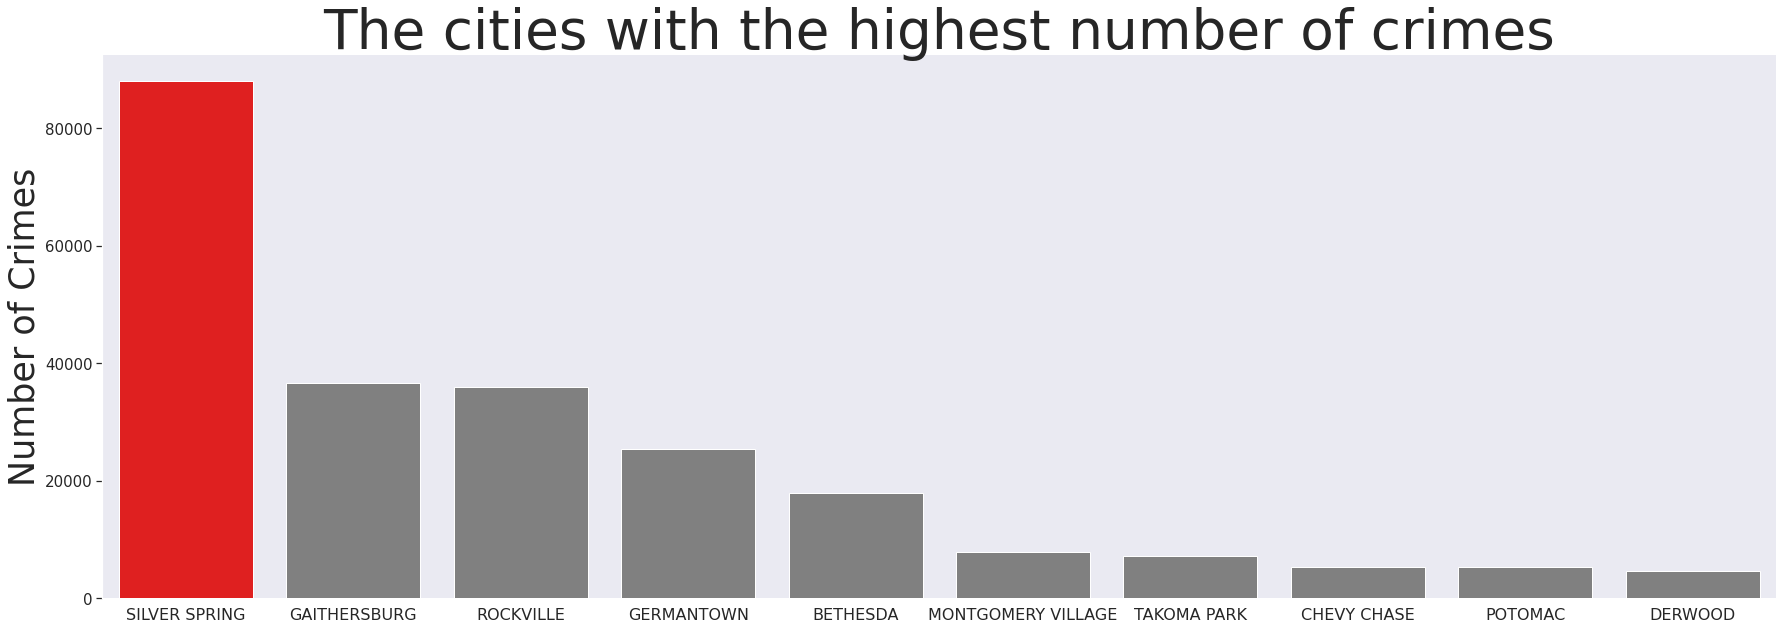

In [92]:
#Refrence: https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

top_crime = top10_crime['Crimes']
colors = ['grey' if (s < max(top_crime)) else 'red' for s in top_crime]

fig, ax = plt.subplots(figsize=(30,10))
sns.set_style('white')
ax=sns.barplot(x='City', y='Crimes',
               data=top10_crime, palette=colors)
plt.title('The cities with the highest number of crimes', fontsize=55)
plt.xlabel(None)
plt.xticks(fontsize=16)
plt.ylabel('Number of Crimes', fontsize=35)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.savefig('dengerous_cities.png')
plt.show()

Likewise, finding the safest city, we figure out there are multiples cities with the minumum number of crimes, just one record, to find the list those cities we can define `["City"]==1` condition, in the created dataframe with `value_counts()` method.

In [93]:
safe_cities = df['City'].value_counts().to_frame()
print ("the number of cities with the least number of crimes:  ",safe_cities[safe_cities["City"]==1].shape)
print ("the names of cities with the least number of crimes:  ",safe_cities[safe_cities["City"]==1])


the number of cities with the least number of crimes:   (14, 1)
the names of cities with the least number of crimes:                       City
BOWIE                  1
FREDERICK              1
TACOMA PARK            1
HAGERSTOWN             1
ROCKVIILE              1
GAIHTERSBURG           1
NORTH BETHESDA         1
CLAEKSBURG             1
NORTH POTOMAC          1
FRIENDSHIP HEIGHTS     1
HYATTSVILLE            1
GAITHERSBUG            1
SILVERS SPRING         1
GREENBELT              1


As a result there are 14 cities which can be consider as the safest cities in this area, to have a better visualisation, in order to compare the numbers in the safest cities we are going plot the 30 safest cities in Marylan county. These 14 cities are shown in blue, in the following bar plot.

In [94]:
top30_safe = a.sort_values('Crimes',ascending=False)[-30:].reset_index(drop=True)
top30_safe

,City,Crimes
0,MOUNT AIRY,58
1,BARNESVILLE,43
2,BEALLSVILLE,39
3,LAUREL,36
4,MT AIRY,19
5,GARRETT PARK,16
6,BELTSVILLE,12
7,HIGHLAND,9
8,WASHINGTON GROVE,8
9,WASHINGTON,6


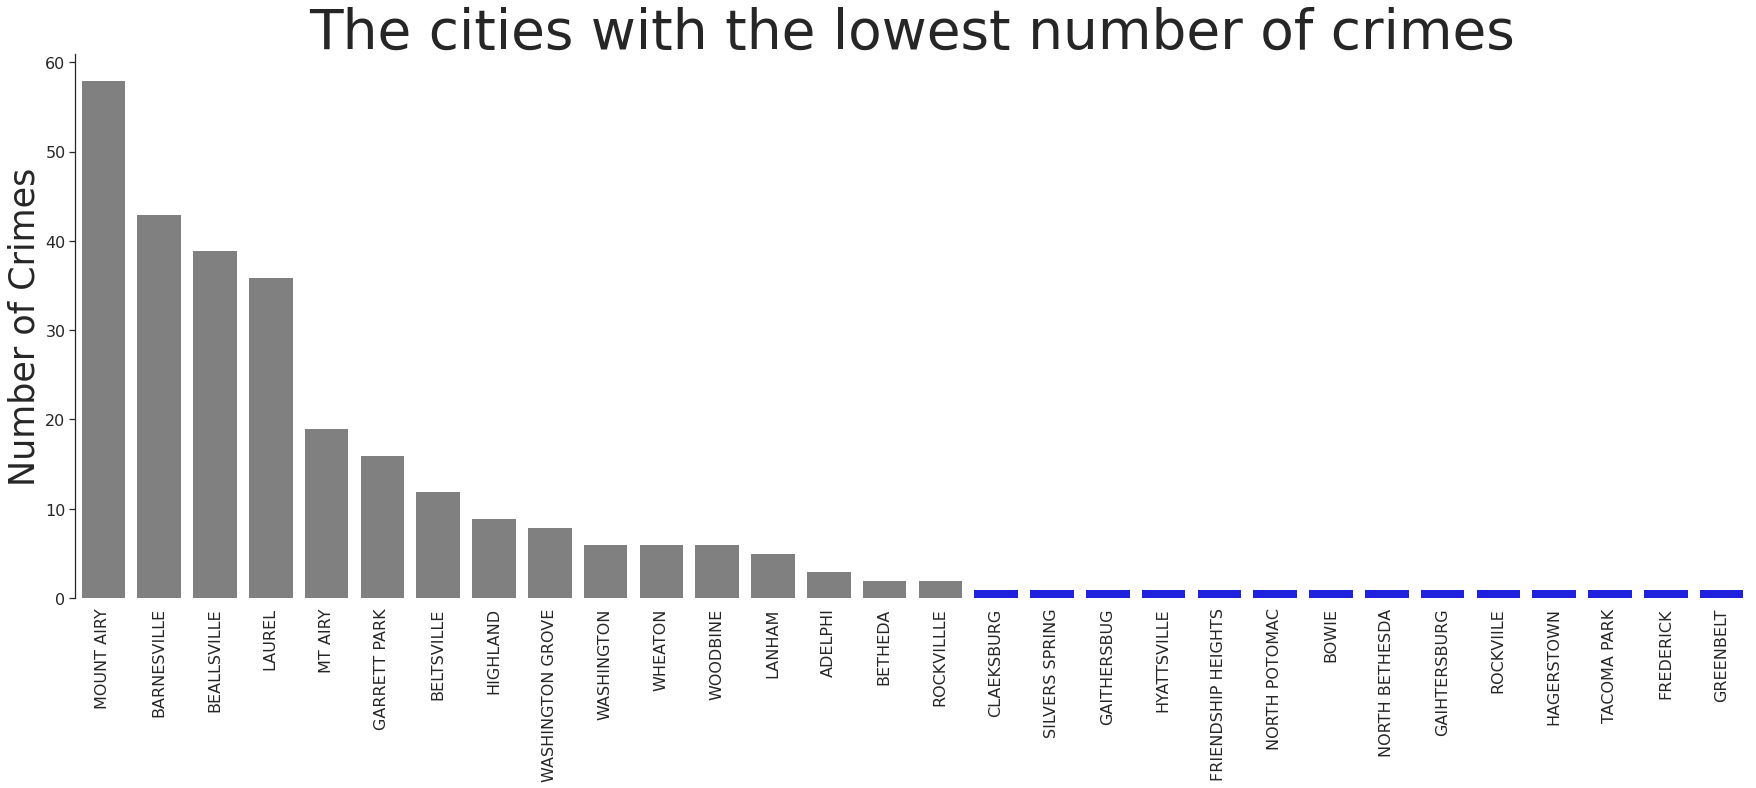

In [95]:
#Ref: https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

top_safe = top30_safe['Crimes']
colors = ['grey' if (s > min(top_safe)) else 'blue' for s in top_safe]

fig, ax = plt.subplots(figsize=(30,10))
sns.set_style('white')
ax=sns.barplot(x='City', y='Crimes',
               data=top30_safe, palette=colors)
plt.title('The cities with the lowest number of crimes', fontsize=55)
plt.xlabel(None)
# As the number of cities is increased for this plot, I am using a rotation for lables, to have a bettter visualisation
plt.xticks(fontsize=16, rotation='vertical') 
plt.ylabel('Number of Crimes', fontsize=35)
plt.yticks(fontsize=16)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.savefig('safe_cities.png')
plt.show()